In [1]:
import numpy as np
import scipy as scp
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [2]:
from scipy import optimize as optm

In [3]:
import scipy.integrate

In [4]:
eps = 0.5
cp = 2.5
phi0 = 0.3
phi1 = 0.2

In [5]:
taup = lambda s_prey, N : cp*(np.sqrt(eps/(phi0*s_prey*N)) - 1/(N*s_prey))

In [6]:
prey_strats = np.linspace(0.01,1,198)

In [7]:
prey_numbers = np.linspace(0.1,30,198)

In [8]:
X, Y = np.meshgrid(prey_strats, prey_numbers)

In [9]:
Z = taup(X, Y)

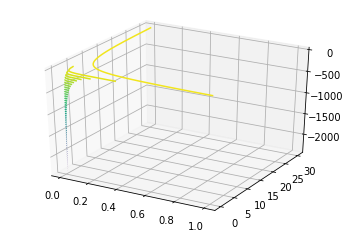

In [10]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50)

In [11]:
taup(0.1, 10)

0.727486121839514

In [12]:
Z[Z<0] = 0

In [13]:
np.max(Z)

1.0416666658182905

In [14]:
taup(prey_strats, 5000)

array([0.40643546, 0.33908607, 0.2974031 , 0.26829726, 0.24646792,
       0.22929981, 0.21533195, 0.20367483, 0.19375138, 0.18516852,
       0.1776479 , 0.17098606, 0.16503039, 0.1596638 , 0.15479475,
       0.15035052, 0.14627246, 0.14251271, 0.13903173, 0.13579656,
       0.13277945, 0.12995688, 0.12730871, 0.12481764, 0.12246866,
       0.12024871, 0.11814635, 0.11615152, 0.11425533, 0.11244987,
       0.11072812, 0.10908377, 0.10751117, 0.10600524, 0.10456139,
       0.10317544, 0.10184361, 0.10056247, 0.09932887, 0.09813992,
       0.096993  , 0.09588566, 0.09481569, 0.09378102, 0.09277975,
       0.0918101 , 0.09087046, 0.08995929, 0.08907518, 0.08821681,
       0.08738296, 0.08657248, 0.0857843 , 0.0850174 , 0.08427084,
       0.08354374, 0.08283527, 0.08214463, 0.0814711 , 0.08081397,
       0.08017259, 0.07954635, 0.07893464, 0.07833692, 0.07775265,
       0.07718135, 0.07662254, 0.07607576, 0.07554059, 0.07501663,
       0.07450349, 0.07400079, 0.0735082 , 0.07302537, 0.07255

In [15]:
Z=Z/25 #Maximum found by numeric experimentation. It _could_ be found analytically. Note that it is global.

In [16]:
taun_fitness = lambda s_prey, C, P, N, : cmax*s_prey*C/(s_prey*C+cmax) - taup(s_prey, N) * s_prey*P - mu0*s_prey - mu1

In [17]:
cmax = 0.3
mu0 = 0.08
mu1 = 0.02

In [18]:
N = 1000
P = 10
C = 2000

In [19]:
taun_fitness(prey_strats, C, P, N)

array([ 1.97704430e-01,  1.75726932e-01,  1.56647680e-01,  1.39590178e-01,
        1.24028793e-01,  1.09627727e-01,  9.61589179e-02,  8.34596902e-02,
        7.14094175e-02,  5.99158240e-02,  4.89065025e-02,  3.83234245e-02,
        2.81192509e-02,  1.82547727e-02,  8.69708685e-03, -5.81733962e-04,
       -9.60563272e-03, -1.83953192e-02, -2.69688490e-02, -3.53420753e-02,
       -4.35290075e-02, -5.15420972e-02, -5.93924703e-02, -6.70901161e-02,
       -7.46440436e-02, -8.20624104e-02, -8.93526319e-02, -9.65214715e-02,
       -1.03575119e-01, -1.10519256e-01, -1.17359111e-01, -1.24099512e-01,
       -1.30744925e-01, -1.37299490e-01, -1.43767058e-01, -1.50151213e-01,
       -1.56455302e-01, -1.62682452e-01, -1.68835594e-01, -1.74917475e-01,
       -1.80930679e-01, -1.86877635e-01, -1.92760634e-01, -1.98581838e-01,
       -2.04343289e-01, -2.10046920e-01, -2.15694561e-01, -2.21287948e-01,
       -2.26828730e-01, -2.32318472e-01, -2.37758666e-01, -2.43150730e-01,
       -2.48496017e-01, -

In [65]:
taun_fitness_II = lambda s_prey, C, P, N, : cmax*s_prey*C/(s_prey*C+cmax) - cp * taup(s_prey, N) * s_prey*P/(taup(s_prey, N)*s_prey*N + cp) - mu0*s_prey - mu1

In [21]:
taun_fitness_II(prey_strats, 2000, 50, 350)

array([ 0.06549484,  0.03932409,  0.02345373,  0.01244705,  0.00419087,
       -0.00233106, -0.00767635, -0.01217989, -0.01605665, -0.01945176,
       -0.02246727, -0.02517727, -0.02763707, -0.02988889, -0.03196561,
       -0.03389325, -0.0356927 , -0.03738101, -0.03897216, -0.04047783,
       -0.0419078 , -0.04327035, -0.04457256, -0.04582049, -0.04701939,
       -0.04817383, -0.0492878 , -0.05036481, -0.05140794, -0.05241995,
       -0.05340328, -0.0543601 , -0.05529238, -0.05620187, -0.05709017,
       -0.0579587 , -0.05880878, -0.05964158, -0.0604582 , -0.06125962,
       -0.06204676, -0.06282043, -0.06358142, -0.06433042, -0.06506809,
       -0.06579503, -0.0665118 , -0.06721893, -0.0679169 , -0.06860615,
       -0.06928711, -0.06996016, -0.07062568, -0.07128401, -0.07193546,
       -0.07258035, -0.07321895, -0.07385153, -0.07447835, -0.07509963,
       -0.07571561, -0.07632649, -0.07693247, -0.07753375, -0.07813049,
       -0.07872287, -0.07931106, -0.07989519, -0.08047542, -0.08

In [22]:
optm.minimize(lambda t: -taun_fitness(t, 2000, 1, 2000), 0.5)

/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


      fun: array([nan])
 hess_inv: array([[1]])
      jac: array([nan])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 336
      nit: 1
     njev: 112
   status: 2
  success: False
        x: array([-133.49157524])

In [23]:
optm.minimize(lambda t: -taun_fitness_II(t, 5, 0, 0.8), 0.5).x[0]

0.41434218650474447

In [24]:
P

10

In [72]:
def optimal_behavior_trajectories(t, y, cmax, mu0, mu1, eps, cp, phi0, phi1, cbar, lam, opt_prey = False, opt_pred=True, seasons = False):
    C = y[0]
    N = y[1]
    P = y[2]
    taun = 1
    taup_opt = 1
    if opt_prey is True and opt_pred is True:
        taun = min(max(optm.minimize(lambda test: -taun_fitness_II(test, C, P, N), 0.5).x[0],0),1)

    elif opt_prey is True:
        #print(optm.minimize(lambda s_prey: -(2*s_prey*C/(s_prey*C+cmax) - taup_opt * s_prey*P/(taup_opt*s_prey*N + cp) - mu0*s_prey - mu1), 0.5).x[0])
        taun = min(max(optm.minimize(lambda s_prey: -(2*s_prey*C/(s_prey*C+cmax) - taup_opt * s_prey*P/(taup_opt*s_prey*N + cp) - mu0*s_prey - mu1), 0.5).x[0],0),1)
    elif opt_pred is True:
        taup_opt = min(max(taup(taun, N),0),1)
    if seasons is True:
        Cdot = lam*(cbar+0.5*cbar*np.cos(t*np.pi/180) - C) - N*taun*C/(taun*C+cmax) #t is one month
    else:
        Cdot = lam*(cbar - C) - cmax*N*taun*C/(taun*C+cmax)    
    Ndot = N*(cmax*taun*C/(taun*C+cmax) - taup_opt * taun*P*cp*1/(taup_opt*taun*N + cp) - mu0*taun - mu1)
    Pdot = P*(cp*eps*taup_opt*taun*N/(N*taup_opt*taun + cp) - phi0*taup_opt - phi1)
    print(taun, taup_opt)
    return [Cdot, Ndot, Pdot]

In [73]:
def optimal_behavior_trajectories_basic(t, y, cmax, mu0, mu1, eps, cp, phi0, phi1, cbar, lam, prey_opt, pred_opt, seasons = False):
    C = y[0]
    N = y[1]
    P = y[2]

    taun = 1
    taup_opt = 1
    if seasons is True:
        Cdot = lam*(cbar+0.5*cbar*np.cos(t*np.pi/180) - C) - 2*N*taun*C/(taun*C+cmax)*10 #t is one month
    else:
        Cdot = lam*(cbar - C) - cmax*N*taun*C/(taun*C+cmax)
    Ndot = N*(cmax*taun*C/(taun*C+cmax) - taup_opt * taun*P*cp*1/(taup_opt*taun*N + cp) - mu0*taun - mu1)
    Pdot = P*(cp*eps*taup_opt*taun*N/(N*taup_opt*taun + cp) - phi0*taup_opt - phi1)
    return [Cdot, Ndot, Pdot]

In [74]:
cmax = 0.3
mu0 = 0.48 
mu1 = 0.08
eps = 0.8
cp = 0.1
phi0 = 0.20
phi1 = 0.4 
cbar = 20
lam = 0.1 
initial_conditions_1 =  [cmax, mu0, mu1, eps, cp, phi0, phi1, cbar, lam]

In [75]:
cmax = 0.3
mu0 = 0.48 
mu1 = 0.08
eps = 0.8
cp = 0.1
phi0 = 0.20
phi1 = 0.4 
cbar = 20
lam = 0.1 
opt_prey = True
opt_pred = False
initial_conditions_2 =  [cmax, mu0, mu1, eps, cp, phi0, phi1, cbar, lam, opt_prey, opt_pred]

In [76]:
cmax = 0.3
mu0 = 0.48 
mu1 = 0.08
eps = 0.8
cp = 0.1
phi0 = 0.20
phi1 = 0.4 
cbar = 20
lam = 0.1 
opt_prey = True
opt_pred = True
initial_conditions_3 =  [cmax, mu0, mu1, eps, cp, phi0, phi1, cbar, lam, opt_prey, opt_pred]

In [77]:
cbar = 30
cmax = 0.3
mu0 = 0.48 
mu1 = 0.08
eps = 0.8
cp = 0.1
phi0 = 0.20
phi1 = 0.4 
cbar = 20
lam = 0.1 
opt_prey = True
opt_pred = True
initial_conditions_5 =  [cmax, mu0, mu1, eps, cp, phi0, phi1, cbar, lam, opt_prey, opt_pred] #Using IC3 values

In [78]:
import sys
from io import StringIO
capture = StringIO()
save_stdout = sys.stdout
sys.stdout = capture

t_start = 0
t_end = 50
init = [0.35, 1.8, 0.1] #[0.23, 0.3, 0.13]#
sol = scipy.integrate.solve_ivp(fun = lambda t, y: optimal_behavior_trajectories(t, y, *initial_conditions_5), method = 'RK45',
                                t_span = [t_start, t_end], y0 = init, max_step = 0.01)
sys.stdout = save_stdout


/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anac

/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anac

/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anac

/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anac

/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anac

/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anac

/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anac

/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anac

/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anac

/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anac

/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anac

/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anac

/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anac

/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anac

/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anac

/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anac

/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anac

/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anac

/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anac

/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anac

/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anac

/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anac

/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anac

/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anac

/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anac

/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anac

KeyboardInterrupt: 

In [103]:
behaviors = np.reshape(np.array([float(x) for x in capture.getvalue().split()]),(int(len(capture.getvalue().split())/2),2))

ValueError: x and y must have same first dimension, but have shapes (5014,) and (30368,)

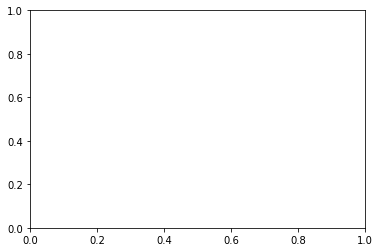

In [105]:
plt.plot(sol.t, behaviors[:,0])

In [117]:
cbar = 30
cmax = 2
mu0 = 0.4 
mu1 = 0.2
eps = 0.5
cp = 2
phi0 = 0.20
phi1 = 0.4 
cbar = 3
lam = 0.5
opt_prey = True
opt_pred = True
initial_conditions_5 =  [cmax, mu0, mu1, eps, cp, phi0, phi1, cbar, lam, opt_prey, opt_pred]

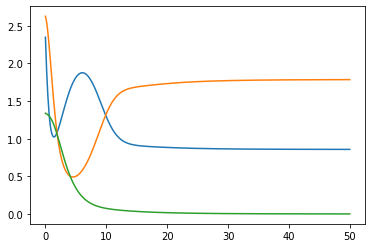

In [118]:
sol_basic = scipy.integrate.solve_ivp(fun = lambda t, y : optimal_behavior_trajectories_basic(t, y, *initial_conditions_5), 
                                    t_span = [t_start, t_end], y0 = init, max_step = 0.1)


plt.plot(sol_basic.t, sol_basic.y[0])
plt.plot(sol_basic.t, sol_basic.y[1])
plt.plot(sol_basic.t, sol_basic.y[2])


In [97]:
init = [sol_basic.y[0,-1], sol_basic.y[1,-1], sol_basic.y[2,-1]]

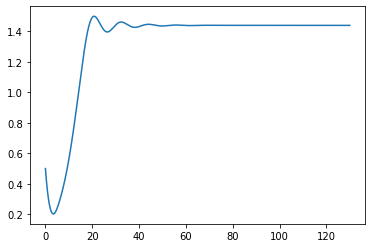

In [130]:
plt.figure()
for i in range(8,9):
    initial_conditions_5 =  [cmax, mu0, mu1, eps, cp, phi0, phi1, (i+1)*1.1, lam, opt_prey, opt_pred]
    t_start = 0
    t_end = 130
    #init = [0.8, 0.5, 0.5] #[0.35, 1.8, 0.1]
    sol_basic = scipy.integrate.solve_ivp(fun = lambda t, y : optimal_behavior_trajectories_basic(t, y, *initial_conditions_5), 
                                    t_span = [t_start, t_end], y0 = init, max_step = 0.1)
    plt.plot(sol_basic.t, sol_basic.y[2])

plt.show()

In [132]:
init_0 = [sol_basic.y[0,-1], sol_basic.y[1,-1], sol_basic.y[2,-1]]


In [159]:
static_store = []
for i in range(8,11):
    initial_conditions_5 =  [cmax, mu0, mu1, eps, cp, phi0, phi1, (i+1)*1.1, lam, opt_prey, opt_pred]
    t_start = 0
    t_end = 120
    if i is 8:
        init = init_0
    else:
        init = [sol_basic.y[0,-1], sol_basic.y[1,-1], sol_basic.y[2,-1]]
    sol_basic = scipy.integrate.solve_ivp(fun = lambda t, y : optimal_behavior_trajectories_basic(t, y, *initial_conditions_5), 
                                    t_span = [t_start, t_end], y0 = init, max_step = 0.1)
    
    static_store.append(sol_basic)


In [158]:
solution_storer = []
for i in range(8,11): #Original 12
    initial_conditions_5 =  [cmax, mu0, mu1, eps, cp, phi0, phi1, (i+1)*1.1, lam, opt_prey, opt_pred]
    t_start = 0
    t_end = 120
    if i is 8:
        init = init_0
    else:
        init = [sol.y[0,-1], sol.y[1,-1], sol.y[2,-1]]
    sol = scipy.integrate.solve_ivp(fun = lambda t, y : optimal_behavior_trajectories(t, y, *initial_conditions_5), 
                                    t_span = [t_start, t_end], y0 = init, max_step = 0.01)
    
    solution_storer.append(sol)


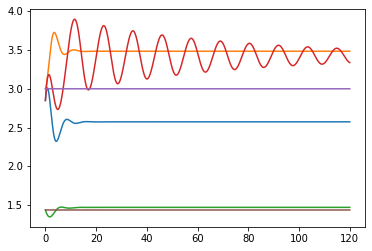

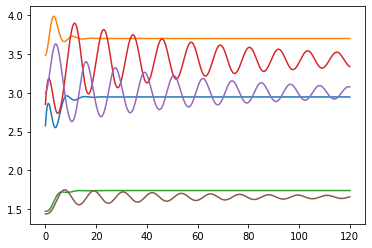

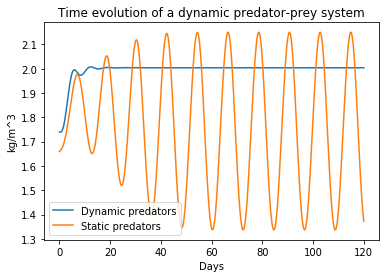

In [168]:
fig1 = plt.figure()
plt.plot(solution_storer[0].t, solution_storer[0].y[0])
plt.plot(solution_storer[0].t, solution_storer[0].y[1])
plt.plot(solution_storer[0].t, solution_storer[0].y[2])

plt.plot(static_store[0].t, static_store[1].y[0])
plt.plot(static_store[0].t, static_store[0].y[1])
plt.plot(static_store[0].t, static_store[0].y[2])




fig2 = plt.figure()

plt.plot(solution_storer[1].t, solution_storer[1].y[0])
plt.plot(solution_storer[1].t, solution_storer[1].y[1])
plt.plot(solution_storer[1].t, solution_storer[1].y[2])

plt.plot(static_store[1].t, static_store[1].y[0])
plt.plot(static_store[1].t, static_store[1].y[1])
plt.plot(static_store[1].t, static_store[1].y[2])


fig3 = plt.figure()

#plt.plot(solution_storer[2].t, solution_storer[2].y[0], label = 'Resource withs static consumption')
#plt.plot(solution_storer[2].t, solution_storer[2].y[1], label = 'Static prey')
plt.plot(solution_storer[2].t, solution_storer[2].y[2], label = 'Dynamic predators')

#plt.plot(static_store[2].t, static_store[2].y[0], label = 'Resource with dynamic consumption')
#plt.plot(static_store[2].t, static_store[2].y[1], label = 'Dynamic prey')
plt.plot(static_store[2].t, static_store[2].y[2], label = 'Static predators')
plt.title('Time evolution of a dynamic predator-prey system')
plt.xlabel('Days')
plt.ylabel('kg/m^3')
plt.legend(loc = 'lower left')
plt.savefig('Dynamic_animals.png')



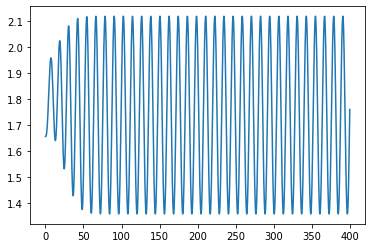

In [154]:

plt.plot(static_store[3].t, static_store[3].y[2])


In [142]:
solution_storer[0].t

array([0.0000e+00, 1.0000e-02, 2.0000e-02, ..., 1.1998e+02, 1.1999e+02,
       1.2000e+02])

In [71]:
init = [1, 0.5, 0.5]
sol = scipy.integrate.solve_ivp(fun = lambda t, y : optimal_behavior_trajectories(t, y, *initial_conditions_5), 
                                    t_span = [t_start, t_end], y0 = init, max_step = 0.05)


/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  """Entry point for launching an IPython kernel.
/home/jaem/anaconda3/envs/advanced_num_diff/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython ke

KeyboardInterrupt: 

In [15]:
plt.figure()
for i in range(8,12):
    initial_conditions_5 =  [cmax, mu0, mu1, eps, cp, phi0, phi1, 5*(i+1), lam, opt_prey, opt_pred]
    t_start = 0
    t_end = 360
    init = [0.8, 0.5, 0.5]
    sol = scipy.integrate.solve_ivp(fun = lambda t, y : optimal_behavior_trajectories(t, y, *initial_conditions_5, seasons = True), 
                                    t_span = [t_start, t_end], y0 = init, max_step = 0.05, t_eval = np.linspace(t_start, t_end, 1000))
    plt.plot(sol.t, sol.y[2])
    plt.plot(sol.t, sol.y[1]) 

plt.show()

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

0.4899837492894209 0.8345071173417564
0.49471389509734265 0.8321441041846052
0.49066493868458294 0.8341657263402694
0.4909908131217766 0.8340052859792644
0.4926042030090506 0.8332153902589479
0.4928882148387136 0.8330782547043076
0.49323205693510735 0.832913111824304
0.4932366234865273 0.8329108444967345
0.49385235888474843 0.8326160693036391
0.49414436670858297 0.832479461663588
0.49558779487616006 0.831808690421424
0.4958328101714222 0.831696873640559
0.4961387681544851 0.8315581837978706
0.4961425706371514 0.8315564506135678
0.4966894796709848 0.8313095263699523
0.49694604035553197 0.8311972808947459
0.4982109437590728 0.8306485809603901
0.4984240625493399 0.830558365580959
0.49868915103420963 0.8304472833587209
0.4986922142921545 0.8304460645662808
0.4991653468587086 0.8302488559214296
0.4993841448046776 0.8301617930894045
0.5004591883793124 0.8297391261631808
0.5006386146001656 0.8296710962410756
0.50086048717854 0.8295883880686685
0.500862730977071 0.8295877173691703
0.5012579585

0.5208566026644534 0.8207776959456178
0.5210987340439948 0.8206554940712805
0.5214030198527787 0.8205025306231288
0.5214074843270389 0.8205002826613623
0.5219522801179842 0.8202271036274255
0.5222128520486758 0.820098656113101
0.5235018293996344 0.8194664709099747
0.5237214382823772 0.8193601568405882
0.5239967717364997 0.8192275460697289
0.5240006764989009 0.8192256906301159
0.5244931249538515 0.8189892072442452
0.5247265069164144 0.8188795617263409
0.5258788431223196 0.8183414687807324
0.5260740014671252 0.8182518319002855
0.5263179446748506 0.818140564123502
0.5263212551414895 0.8181391152914868
0.5267570235595287 0.8179410781136417
0.5269612632238156 0.8178509808258245
0.5279669450714021 0.8174108048854472
0.5281360264330295 0.8173384404257003
0.5283464593250452 0.8172492897406707
0.5283491344818145 0.8172482632701564
0.5287244882428823 0.8170900236671685
0.5288977906472441 0.8170200892143176
0.5297484123758965 0.816680623101905
0.5298899822440307 0.8166259896348482
0.5300651856030

0.5254724926813575 0.8204315481109422
0.5258615558314145 0.8202297826886991
0.5260485675800055 0.8201341621460507
0.5269743372864447 0.8196627236802743
0.5271323770939406 0.8195830844124692
0.5273310349954927 0.8194833964380281
0.5273341159875743 0.8194818708527156
0.5276895293072041 0.8193039369181605
0.5278590320854794 0.8192205537465025
0.5286966718628995 0.818810459078804
0.5288389645650352 0.8187416939425375
0.5290172834271781 0.818655980542006
0.5290200008341458 0.8186547084983642
0.5293387795149759 0.8185019136857461
0.5294893934175166 0.8184313506454368
0.5302318966904416 0.8180855448510213
0.5303572400894719 0.8180281478537855
0.5305138399853683 0.8179569636104068
0.5305160990776002 0.8179559874736207
0.5307956393278824 0.8178293820404527
0.5309261083201723 0.8177721248791499
0.5315676297241854 0.8174928214105945
0.5316749585323557 0.8174471900626649
0.53180859645648 0.8173909843921021
0.5318104333875252 0.8173902848706825
0.5320485190245787 0.817290665023142
0.532157883463901

0.519867690340774 0.8248533745859462
0.5198704734851086 0.8248517933865458
0.5201708717608194 0.8246815032547463
0.5203180503339057 0.8245987787946933
0.5210492079913027 0.8241888531771822
0.5211755452707394 0.8241184637017145
0.5213351936569839 0.824029716683566
0.5213378351108613 0.8240282496547471
0.5216240868529631 0.8238693470141809
0.5217636411571935 0.8237926157336233
0.5224561651798305 0.8234128850955308
0.5225754362491025 0.8233479406215317
0.5227259065777348 0.8232662173693654
0.5227283792159861 0.8232648787777271
0.5229981183357484 0.8231186115434951
0.5231288674382494 0.8230484849068029
0.5237769234052867 0.8227019585798971
0.5238880889570083 0.8226429874511183
0.5240282263383971 0.8225688791780346
0.5240304923738895 0.8225676875936765
0.524281439741057 0.8224352101424486
0.5244022725435975 0.8223722404302765
0.5250005393908207 0.8220615566476424
0.5251027159487457 0.822008991555503
0.5252312765255427 0.8219431017289307
0.5252333869681033 0.8219420340253499
0.52546341333810

0.5161624502337873 0.8278096679060454
0.5162642904752514 0.8277485779635552
0.5167715891827411 0.8274448208968235
0.516860072415744 0.8273920869513576
0.5169723438029502 0.8273252872826288
0.5169742201471438 0.8273241669069775
0.5171758878035574 0.8272043022984246
0.5172757298374121 0.8271453619681333
0.5177729069052648 0.8268524445958065
0.5178594035423171 0.8268017341669593
0.5179690071032944 0.8267375856205585
0.5179709301121748 0.8267364678649174
0.5181677212890632 0.8266214157001991
0.5182648127073093 0.8265650699697991
0.5187476422966387 0.8262854257654926
0.5188314473752369 0.8262371445233497
0.5189374553929165 0.8261761763943543
0.5189392698081274 0.8261751365214355
0.5191295879922695 0.8260658133916068
0.5192230428995699 0.82601255547555
0.519687415292847 0.8257484913579891
0.5197677547044718 0.8257030651903239
0.5198693676371912 0.8256457306244355
0.519871083899649 0.8256447647667673
0.5200532627128747 0.8255420906172551
0.520142344321994 0.8254923288815053
0.5205843721175032

0.5132353700913853 0.8301113130023301
0.5135336183081041 0.8299167277468851
0.5135863919111832 0.8298824566376615
0.5136537464189893 0.829838792930853
0.5136549019248522 0.829838043237801
0.5137761725705727 0.8297594981812224
0.5138376301426127 0.829719963044154
0.5141451056078076 0.829522518295789
0.5141993613948984 0.8294878335881648
0.5142685558371192 0.8294436760427184
0.5142697267210955 0.8294429255597991
0.514394199296474 0.8293635525942293
0.5144570439346751 0.8293237455010312
0.5147709249476247 0.8291252312161732
0.514826214555875 0.8290904234919
0.5148965516727432 0.8290462010980897
0.514897735616406 0.829045452916781
0.5150242744901525 0.8289659671647795
0.5150878980169064 0.8289262625846301
0.515405417885013 0.828728417583321
0.5154611868686663 0.8286938229325922
0.5155320772612817 0.8286499079476545
0.5155333034346959 0.828649149948349
0.5156607644868748 0.8285702596686244
0.5157245888105697 0.8285310120868175
0.5160429599146413 0.8283355558910432
0.5160986962207289 0.82830

0.5127403920542439 0.8308274211671429
0.5127612914211016 0.8308112587967971
0.5128671484166294 0.8307297570421419
0.5128864824772654 0.8307150419465775
0.5129115221981692 0.8306960863983934
0.5129119490406143 0.8306957609860387
0.5129572630550348 0.8306615199609315
0.5129813897178961 0.8306436013595058
0.5131030464126503 0.8305535111623932
0.5131251462516692 0.8305373081241427
0.5131535833620785 0.8305165242340773
0.5131540966167546 0.8305161542758325
0.513205488594144 0.8304786472348089
0.513232547490388 0.8304591736299753
0.5133688027170824 0.8303613714698386
0.5133933965494318 0.830343863223002
0.5134249634299085 0.8303214467432686
0.5134254959248341 0.8303210652016753
0.5134825204041142 0.8302806272647133
0.5135122143536156 0.8302598016893022
0.5136616696098445 0.830155261107812
0.5136884739587408 0.8301366366469503
0.5137228211191425 0.8301128225511639
0.5137234490550204 0.8301123943784856
0.5137854682502061 0.830069452389652
0.5138175691199324 0.8300474455309977
0.513978750682293

0.5140672029038773 0.830179366844839
0.5140739091793942 0.8301703586757071
0.5140784050935037 0.8301651790040098
0.5141019456696185 0.8301386770042752
0.5141067253327494 0.8301336528873182
0.514113030060578 0.8301271233567937
0.5141131548340772 0.8301270019882602
0.5141247802117814 0.8301150979742773
0.5141316763186291 0.8301085124516769
0.5141672911202376 0.830074966001807
0.5141741297786483 0.8300687426400022
0.5141830883688953 0.8300606752583048
0.5141832744435005 0.8300605200482367
0.5141996547028863 0.8300458625538922
0.5142088994963422 0.8300379288518792
0.5142560813061415 0.8299977445822444
0.5142649374024117 0.8299903713495826
0.5142764578190959 0.8299808476132935
0.5142766678557187 0.8299806769202762
0.5142975724207334 0.8299634434042573
0.5143090354280397 0.8299542581796688
0.514367234261469 0.829907871509862
0.5143779725849389 0.8298994433753947
0.5143918771197507 0.8298885869806094
0.5143921347374851 0.8298883903866929
0.5144173939534997 0.8298687327653753
0.514430932402452

0.5151690562994143 0.8295408793179887
0.5151690252686676 0.8295408649182197
0.5151677982224008 0.8295385061642472
0.5151678725198933 0.8295369048721573
0.5151691567491741 0.8295283856206229
0.5151697827179756 0.8295266519287994
0.5151707847760562 0.8295243253497353
0.5151707837835484 0.8295242926791229
0.515172740434229 0.8295200158928954
0.5151744248687283 0.8295174546034777
0.5151835581406711 0.8295042413634146
0.5151855567377881 0.829501690999388
0.5151883094253892 0.8294983256732955
0.5151883497174947 0.8294982699779954
0.5151934040049714 0.8294921511659814
0.5151965994172495 0.8294886949995881
0.5152134316057314 0.829470951233518
0.5152167318899973 0.829467634258143
0.5152211434654361 0.8294632947366397
0.5152212428871311 0.8294632078924915
0.515229334995414 0.8294553136925633
0.5152340385961107 0.8294509838248082
0.5152582531205908 0.8294289582648225
0.5152628492559581 0.8294248952104215
0.5152688629351935 0.8294196309540003
0.5152690029381252 0.8294195221333758
0.515280011824052

0.5159396563233188 0.8290999654214841
0.5159315232470914 0.8291030862078497
0.5159278990082041 0.8291043647666596
0.5159103176303009 0.8291104305235457
0.5159074995348218 0.8291113294330362
0.5159040335756918 0.8291123978869078
0.5159039658402872 0.8291124193401571
0.5158978000713642 0.8291142928421609
0.5158951604781123 0.8291149500451777
0.5158825209688432 0.8291179054295429
0.515880582807401 0.8291182545458
0.5158781605983719 0.829118660038299
0.5158781581040813 0.8291186478255351
0.5158739858346149 0.8291192752385899
0.5158723727130162 0.8291192987696445
0.5158647111987346 0.8291191640719264
0.5158636509769813 0.8291189711357716
0.5158623304344796 0.8291186952801121
0.51586231341274 0.8291186871508506
0.5158601601693144 0.8291180725551732
0.5158595388437717 0.8291174873072527
0.5158568383864239 0.8291143139670984
0.5158566062698624 0.8291136104042964
0.5158564688010634 0.8291126251695078
0.5158564808670024 0.8291126006530086
0.5158562853390283 0.8291107913346901
0.5158566367825788 

0.5164557384406977 0.8287863960968542
0.5164513757018322 0.8287885712824721
0.5164298212326424 0.8287992715009231
0.5164261820314588 0.8288010544515669
0.5164216465872579 0.8288032653304849
0.5164215440012738 0.8288033144880835
0.516413384367808 0.8288072805358377
0.5164095647824104 0.828809092844812
0.5163907388730036 0.8288179743813144
0.5163875873187127 0.8288194344445414
0.5163836549215144 0.8288212428876462
0.5163835924638196 0.8288212711506349
0.516376560941471 0.8288244932222275
0.5163732884713925 0.8288259421325049
0.5163573288786959 0.8288329474375757
0.5163546676491484 0.8288340849165438
0.5163513753065019 0.8288354755707446
0.5163513355398972 0.8288354910430429
0.5163454361275426 0.8288379709603535
0.5163427834491823 0.8288390245963787
0.5163297876364397 0.8288441195717624
0.5163276761591147 0.8288449086695627
0.5163250318617137 0.8288458807331334
0.5163249838948991 0.8288458982573133
0.5163203274321435 0.8288475894616258
0.516318250924903 0.8288482714674544
0.51630824546392

0.517027436363274 0.8284346701217696
0.517004732059396 0.8284485504498593
0.5170007641359949 0.8284509667613664
0.5169956851569764 0.8284540498646945
0.5169956161754631 0.828454094241038
0.5169865738568604 0.8284595905569536
0.5169820612426513 0.8284623145577065
0.5169595868936483 0.8284758628337806
0.5169556478198924 0.8284782251478386
0.516950682233052 0.8284812029411444
0.5169505625107956 0.8284812701487474
0.5169416568534573 0.8284866081945639
0.5169372094602702 0.8284892524068643
0.5169150945694105 0.828502384531346
0.5169112605152953 0.8285046531509808
0.5169063834058535 0.8285075323628668
0.5169062987184 0.8285075820218417
0.5168975519090078 0.8285127424769205
0.5168932471177191 0.8285152663534623
0.5168717831145381 0.8285278246389163
0.5168680587250147 0.8285299936914883
0.5168633196082824 0.8285327466272251
0.5168632282637672 0.8285327985158994
0.5168547465919846 0.8285377236284789
0.5168506016595729 0.8285401153775418
0.5168298621983394 0.8285520471450363
0.5168263299747394 0

0.5171660751071945 0.8283284073717134
0.5171612383664338 0.8283316619140135
0.5171587731078126 0.8283333102559014
0.5171463827222899 0.8283415740496204
0.5171441722373618 0.8283430391717208
0.5171413659033783 0.828344899618374
0.5171413064928155 0.8283449370517978
0.5171362394515407 0.8283482912416917
0.517133643584715 0.8283499947172688
0.5171206524334209 0.8283585076920699
0.5171183686628326 0.8283600004735372
0.5171154240616959 0.8283619166445251
0.5171153858981555 0.8283619438008227
0.5171100865267807 0.828365390072529
0.5171074143095111 0.8283671190185238
0.5170939729537143 0.8283757895683841
0.517091594492435 0.8283773162791612
0.5170885638050268 0.8283792590563079
0.5170885148160118 0.828379291148182
0.5170830412578665 0.8283827939831837
0.5170802979280019 0.82838454189194
0.5170665201377377 0.8283932965222246
0.5170641052260525 0.8283948263986695
0.5170610128784331 0.8283967799333807
0.5170609377035951 0.8283968240087601
0.5170553628637433 0.828400341290006
0.5170525754816733 0

0.5171570038216811 0.8283180786971354
0.5171554599440504 0.8283193387751424
0.5171546056173844 0.828320013861905
0.5171503168707939 0.8283234002853399
0.5171495114350012 0.8283240221036505
0.517148501990637 0.8283248074122277
0.517148480271275 0.8283248230646586
0.5171466187692413 0.8283262579631998
0.5171456262439103 0.8283270096017213
0.5171405914079562 0.8283308031848972
0.5171396725518066 0.8283314875080522
0.5171384994569521 0.8283323611240356
0.5171384968702807 0.8283323680513266
0.5171363493393658 0.8283339576049092
0.5171351858696089 0.8283347984630235
0.5171294860192823 0.8283389476953978
0.5171284537769126 0.828339692220544
0.5171270989822067 0.8283406596347012
0.5171271040558086 0.8283406630097939
0.5171246844196036 0.8283423952413862
0.517123440719331 0.8283432800104071
0.5171171064763728 0.8283477568197442
0.5171159855996715 0.8283485473923365
0.5171145086866904 0.8283495775094469
0.5171145143917965 0.8283495808292485
0.5171118246890286 0.828351449288324
0.5171104566569767

0.5170849851562327 0.8283500148710929
0.5170855295962984 0.8283498005929177
0.5170855286450166 0.8283498018309021
0.5170865055971494 0.8283494194606905
0.5170869480821496 0.828349258467002
0.5170890891759904 0.8283484955599703
0.517089407203768 0.8283483934065891
0.5170898382407385 0.8283482532843789
0.5170898516949282 0.8283482481529993
0.5170905769810037 0.8283480214855903
0.5170908996725683 0.8283479351975906
0.5170924529569877 0.8283475399549569
0.5170927111614971 0.8283474817207436
0.5170930021118807 0.8283474274422666
0.5170930051067629 0.8283474276245422
0.5170935265083352 0.8283473326847473
0.5170937409799933 0.8283473148244084
0.5170947086680993 0.8283472819677902
0.5170948509940512 0.8283472932555063
0.5170950265528199 0.8283473122173859
0.5170950235268248 0.8283473154962129
0.5170953005329999 0.8283473694591597
0.5170953855553456 0.8283474290075635
0.5170957673575632 0.8283477536680715
0.5170958126464844 0.8283478246817928
0.5170958159112511 0.8283479424252345
0.517095856916

0.5169836643183677 0.8284094740293828
0.516985242555536 0.8284085476991638
0.5169860298692196 0.8284080900705282
0.5169899957543023 0.8284057944371428
0.516990656924043 0.8284054107353516
0.5169915271130804 0.8284049103707237
0.5169915537338614 0.8284048963972419
0.5169931069602948 0.8284040032938738
0.516993852198477 0.8284035764388482
0.5169976218923072 0.8284014281977147
0.5169982753263613 0.828401058034241
0.5169991045892403 0.8284005894558122
0.5169991351636268 0.8284005737175676
0.5170006093809271 0.82839974033032
0.5170013017603967 0.8283993498354242
0.5170049065215988 0.8283973368392241
0.5170055103999449 0.8283970001856124
0.5170062508344068 0.8283965863960091
0.5170063189945882 0.8283965532320536
0.5170077118615453 0.8283957815895768
0.5170083790321248 0.8283954148925473
0.5170117155074656 0.8283935876731456
0.5170122886129025 0.828393276009755
0.5170130247438995 0.8283928777042833
0.5170130483955555 0.82839286571447
0.5170143400906371 0.8283921658274709
0.5170149434602646 0.

0.5169548083290798 0.8284299767011613
0.5169574506033603 0.8284283377024866
0.5169578672869409 0.8284280732539417
0.5169584929125661 0.8284276926203789
0.5169584878447862 0.8284276936558651
0.5169595613144852 0.8284270339834698
0.5169600438725385 0.8284267315965377
0.5169626719885534 0.8284251218776901
0.5169631250060993 0.828424844687293
0.5169637079103582 0.8284244894919026
0.5169637353044784 0.8284244750412838
0.5169647945348915 0.8284238316453465
0.5169653239438231 0.8284235123370233
0.5169679167009213 0.8284219447645083
0.5169683613832116 0.8284216760117366
0.5169689499485505 0.8284213240576975
0.516968928668841 0.8284213327375648
0.5169699942936183 0.8284206970982164
0.5169705143165256 0.8284203878209887
0.5169730714879338 0.8284188652856381
0.5169734938179408 0.8284186121545106
0.5169740725095047 0.8284182713777961
0.5169740750630001 0.8284182689279014
0.5169751048988711 0.8284176618901382
0.5169756104809902 0.8284173655158713
0.5169780871503927 0.8284159115257566
0.516978551801

0.5169441179897559 0.8284390075307243
0.5169444181897217 0.8284388032910333
0.5169444201380176 0.8284388012029407
0.5169449855174075 0.8284384219563148
0.5169452562500457 0.8284382380198609
0.5169466912899102 0.8284372810503079
0.5169469282828626 0.8284371203337504
0.5169472499814322 0.8284369064322563
0.5169472924911813 0.8284368853063441
0.5169478542053927 0.8284365086176404
0.5169481397185183 0.8284363183899617
0.5169496247883664 0.8284353413650904
0.5169498975728237 0.8284351645085986
0.5169502457614453 0.8284349391501538
0.5169502357466161 0.8284349428026188
0.5169508361719753 0.8284345497683465
0.5169511419439147 0.8284343511611523
0.5169526998500976 0.8284333458287149
0.516952985882923 0.828433163915852
0.5169533069517854 0.8284329528012753
0.51695332666261 0.8284329425147654
0.5169539959853532 0.8284325199220754
0.5169542858669195 0.8284323303747994
0.5169558682749599 0.8284313218102459
0.5169561264528765 0.8284311546641793
0.5169565000330122 0.828430920972236
0.516956513676331

0.5169459212384064 0.8284396859293927
0.5169459970070991 0.8284396188940177
0.516946492590378 0.8284392285823414
0.5169465410882691 0.8284391778854197
0.5169466764975897 0.8284390785569272
0.5169467008000841 0.8284390663988167
0.5169469364725098 0.8284388912902678
0.5169470210937737 0.8284388187048315
0.5169475808910106 0.828438391450959
0.5169476931108714 0.8284383097525165
0.5169478234033894 0.8284382114531497
0.5169478292076943 0.8284382079142512
0.5169480602530775 0.8284380325245064
0.5169482285188538 0.8284379195923663
0.5169488538388974 0.8284374562735788
0.516949021046044 0.8284373477446
0.5169491391906694 0.828437254039118
0.5169491176615542 0.8284372636200433
0.5169494112400097 0.8284370570555157
0.5169495645508052 0.8284369503728786
0.516950256516978 0.8284364521228116
0.5169504090828103 0.828436350010369
0.5169505459155764 0.8284362468891902
0.516950581725984 0.8284362293657381
0.5169508753111249 0.828436021609498
0.5169510308271413 0.8284359134423767
0.516951847520879 0.828

0.5169587612117738 0.8284338019484376
0.5169586142487195 0.8284338793512303
0.5169586192781923 0.8284338771127154
0.5169583876613856 0.8284340007252152
0.516958278939462 0.8284340581646217
0.5169577394995153 0.8284343421954947
0.516957639713577 0.8284343938415539
0.5169575261893752 0.8284344529638275
0.5169575212015547 0.8284344554036926
0.5169573056140045 0.8284345668439299
0.5169572303269462 0.8284346062564117
0.5169567119387679 0.8284348687546961
0.5169566355046701 0.8284349073553477
0.5169565194201314 0.8284349650565781
0.5169565388962237 0.8284349560466446
0.5169563173815264 0.8284350655977523
0.5169562361774382 0.8284351054523578
0.5169557886285493 0.8284353230280483
0.5169557332731441 0.8284353496659946
0.5169556130673114 0.8284354067200913
0.5169556161303541 0.8284354054037779
0.5169554539435633 0.8284354824495177
0.5169553880683204 0.8284355127861871
0.5169549944642674 0.8284356935074846
0.5169549492928395 0.8284357134150777
0.5169548437578797 0.8284357610266877
0.516954878880

0.5169768093019562 0.8284221817328123
0.5169767129499343 0.828422260410413
0.5169766227765626 0.8284223196267823
0.5169762628160962 0.828422573020638
0.5169761930210098 0.8284226207395703
0.5169761379797113 0.8284226655265037
0.516976144892078 0.8284226624441344
0.5169759962368228 0.8284227662582057
0.5169759227372139 0.82842281787526
0.5169755369531087 0.8284230844017705
0.5169754646798193 0.8284231333158738
0.5169754075152493 0.8284231792345376
0.5169753644024487 0.8284231998181286
0.5169752377573096 0.8284232935862439
0.5169751382766521 0.8284233574688653
0.5169747070897004 0.8284236456239042
0.5169746526375173 0.8284236862843903
0.5169745459500965 0.8284237554679388
0.5169745555609606 0.8284237511413025
0.5169744124550458 0.8284238526049592
0.5169743070559004 0.8284239191821041
0.5169738648071213 0.8284242120335232
0.5169737587273197 0.8284242767909076
0.5169736930317306 0.8284243265599127
0.5169736873846585 0.8284243294087179
0.5169735068161755 0.8284244481289567
0.516973434053217

0.5169731064725522 0.8284233581259159
0.5169730963389768 0.8284233615163068
0.5169731797395709 0.8284233207455534
0.5169731694112542 0.8284233255177754
0.5169732960970137 0.8284232632354481
0.5169733290654597 0.8284232468613395
0.5169735594485214 0.8284231348294353
0.516973565891947 0.8284231314876374
0.5169736058843876 0.8284231123634321
0.5169736263164872 0.8284231026394877
0.5169737074990408 0.8284230639864107
0.5169737450396993 0.8284230465998442
0.5169739274153798 0.8284229627099156
0.5169739645686439 0.8284229458541447
0.5169739861685915 0.8284229365914474
0.516974000682181 0.8284229297986616
0.5169740690769853 0.8284228993872704
0.5169740826173393 0.8284228943765594
0.5169742736015317 0.8284228119768318
0.5169742949851182 0.8284228035096413
0.516974311829993 0.8284227977192056
0.5169743350531351 0.8284227868120747
0.5169743787630423 0.8284227701796049
0.5169743929704453 0.8284227659408101
0.5169745443357636 0.8284227075191473
0.5169745253352256 0.8284227189075828
0.5169745533580

0.5169666519101134 0.8284273364044713
0.5169667019252172 0.8284273047775235
0.5169666575243703 0.8284273256299376
0.5169667564205708 0.8284272646667548
0.5169668070945121 0.8284272337799703
0.5169670380918262 0.8284270901348936
0.5169670886373876 0.8284270603477171
0.516967151845388 0.8284270230142976
0.5169671400714271 0.8284270284055244
0.5169672683070977 0.8284269544866121
0.51696731230983 0.8284269271645206
0.5169675406829445 0.8284267869735972
0.5169675683185404 0.8284267684072372
0.5169676213765535 0.8284267363662885
0.5169676276476138 0.8284267331910489
0.5169677294107459 0.8284266726296126
0.516967771327298 0.8284266467772068
0.5169679960532069 0.8284265107406577
0.516968057002878 0.8284264769324154
0.5169681139468936 0.8284264436321142
0.5169680994870169 0.8284264502692487
0.5169681993025488 0.8284263916487198
0.5169682315497012 0.8284263708695262
0.5169684612008727 0.8284262352104714
0.5169685171836123 0.8284262042277158
0.5169685687877887 0.8284261740608136
0.516968549702500

0.5169658552879639 0.8284280357321985
0.5169659542259891 0.8284279636499251
0.5169659953740572 0.8284279398479731
0.51696604011626 0.8284279131476188
0.5169660439821052 0.8284279112632389
0.5169660777039877 0.8284278852268834
0.5169660938484238 0.828427872584252
0.5169662149840367 0.8284277904938574
0.5169662602809367 0.8284277648197285
0.5169662748778727 0.828427752403126
0.5169662773170177 0.8284277511898152
0.5169663779451684 0.8284276939568485
0.5169663648646414 0.8284276951511138
0.5169665062960769 0.8284276042252086
0.5169665047068759 0.8284276008545897
0.5169665595916821 0.8284275697343504
0.5169665823548133 0.828427558703489
0.5169666281039597 0.8284275275231241
0.5169666769425226 0.8284274998229335
0.516966798099335 0.8284274192059847
0.516966839328527 0.8284273956918469
0.5169668800765654 0.8284273713407092
0.5169668734053836 0.8284273744739006
0.5169669348881648 0.8284273362863522
0.516966965381214 0.8284273174033131
0.5169671256839729 0.8284272194789861
0.5169671160744722 0

0.5169660851593253 0.8284280196922724
0.5169661017637305 0.8284280091560872
0.5169661141860653 0.8284279998016384
0.5169661284273921 0.8284279930416303
0.5169661398666326 0.828427981349778
0.5169661441955322 0.828427976133413
0.5169662117639624 0.8284279285006364
0.5169662313590061 0.8284279164920775
0.516966264651473 0.8284278973110389
0.5169662366184217 0.8284279104240014
0.516966287279048 0.8284278802432987
0.5169662929385579 0.8284278743735642
0.5169663715462616 0.8284278214696748
0.5169663792106857 0.8284278151210087
0.5169663999141388 0.8284278018447949
0.5169663976032719 0.8284278027739804
0.5169664387381208 0.828427777044203
0.5169664528646944 0.8284277672041267
0.5169665352415983 0.8284277125511286
0.516966544911195 0.8284277052394059
0.5169665608988285 0.8284276941864593
0.5169665465761992 0.8284277008108276
0.5169665934517909 0.8284276724256447
0.516966623719991 0.8284276550410625
0.5169666743489927 0.8284276154644243
0.5169667306563115 0.8284275862856982
0.5169667101094337 

0.5169664507316115 0.8284278827943603
0.5169664528646944 0.8284278801248601
0.5169664939579381 0.8284278524677489
0.5169664808454297 0.8284278571388356
0.5169664864920873 0.8284278525817945
0.5169664918248758 0.8284278500299713
0.516966488698354 0.828427848053728
0.516966482897316 0.8284278490105668
0.5169665344549674 0.8284278159458343
0.5169665150272045 0.8284278234814706
0.5169665491462251 0.8284278054645213
0.5169665394426419 0.8284278099917068
0.5169665415757178 0.8284278053676343
0.5169665777227755 0.8284277865537054
0.5169665784965756 0.8284277769261708
0.5169666214198209 0.8284277550777912
0.5169665946823706 0.8284277655020252
0.5169665867465485 0.8284277693019925
0.5169666155015753 0.8284277520351517
0.51696661364027 0.8284277509937708
0.5169666649727144 0.8284277173386245
0.5169666663112364 0.8284277150638044
0.5169666665908257 0.8284277127895391
0.5169666583957006 0.828427716526008
0.5169666770471689 0.828427703890722
0.5169666935784173 0.828427694169474
0.5169667385507096 0

0.5169669323475273 0.8284276440916556
0.5169669170080404 0.8284276508002897
0.5169669197189951 0.8284276494186537
0.5169669244006283 0.8284276463123589
0.5169669242960994 0.8284276458537854
0.5169669210363825 0.8284276448054537
0.5169669252684412 0.8284276423526513
0.5169669011141708 0.8284276530649313
0.5169669201866518 0.8284276440797955
0.5169669045651094 0.8284276502746588
0.5169669070669219 0.828427648482488
0.5169669064891715 0.8284276456046755
0.5169669112050477 0.8284276427829727
0.5169668863289998 0.8284276537064211
0.5169669015014872 0.8284276466214444
0.5169669105461947 0.8284276410234024
0.5169669042931381 0.8284276432350408
0.516966885785636 0.8284276482765214
0.5169669071478893 0.8284276376141919
0.5169668963043557 0.8284276418522081
0.5169669070669219 0.8284276367361365
0.5169669051428123 0.8284276360830594
0.5169669117486355 0.8284276321616757
0.5169669166734061 0.8284276257083438
0.5169669026227443 0.8284276315411851
0.5169669178758556 0.8284276234144352
0.516966916945

0.5169674379185516 0.8284273531567482
0.5169674452407099 0.8284273503973605
0.5169674295951681 0.828427358041665
0.5169674021580637 0.8284273723982057
0.5169674062884215 0.8284273707447001
0.516967415197306 0.8284273668662907
0.5169673978915138 0.8284273749108864
0.5169674090804223 0.8284273701683977
0.5169674019596682 0.8284273737270161
0.516967406908201 0.8284273724647997
0.5169673626857222 0.8284273934264835
0.5169673814759411 0.8284273848137017
0.5169673800145627 0.8284273854370396
0.5169673537456051 0.8284273981158385
0.5169673535077688 0.8284273983650149
0.5169673392663812 0.8284274056738195
0.5169673650307325 0.8284273936293132
0.5169673086372392 0.8284274201955726
0.5169673480784488 0.8284274017504256
0.5169673273748352 0.8284274116449859
0.5169673274168637 0.8284274116770487
0.5169673356460395 0.8284274080172843
0.5169673218044539 0.8284274144974784
0.5169673014538684 0.8284274240563883
0.5169673350606946 0.8284274083357017
0.5169672957867366 0.828427426783487
0.51696729072577

0.5169678949128702 0.8284270666657833
0.5169679009119967 0.8284270644214771
0.5169678600488228 0.828427086459759
0.5169678418854639 0.82842709549887
0.5169678504526116 0.8284270920962138
0.5169678479402755 0.8284270932610887
0.5169678492501699 0.8284270937676317
0.5169678171249026 0.8284271093952444
0.5169678201373852 0.8284271107184558
0.5169677979176173 0.8284271216774386
0.5169678009814369 0.8284271208646214
0.5169677979596212 0.8284271221869484
0.5169678015669373 0.8284271215598932
0.5169678263614159 0.8284271104414405
0.5169678148777612 0.8284271184156704
0.5169678009814369 0.8284271253610669
0.5169678019120317 0.8284271254629043
0.5169677914975633 0.828427130410156
0.5169678068471757 0.8284271242163477
0.5169677674586749 0.8284271431945367
0.5169677304145758 0.8284271630395532
0.5169677100639137 0.8284271731079027
0.5169677290214656 0.828427164773786
0.5169677536040945 0.8284271530743021
0.5169677464833488 0.8284271573556897
0.5169677669149376 0.8284271482195553
0.516967728835756

0.516967948406937 0.8284270196910404
0.5169679189177382 0.828427033630948
0.5169679222532133 0.8284270328407012
0.5169679358359441 0.8284270268541694
0.5169678914804224 0.8284270496186633
0.5169679170906365 0.828427037929753
0.516967905878514 0.8284270436094813
0.5169678905498291 0.8284270508330558
0.5169679038607188 0.8284270453607456
0.5169679088484447 0.8284270434060842
0.5169678795499291 0.8284270591017373
0.5169678732440798 0.8284270624230399
0.5169678736315556 0.8284270626661919
0.5169678826134843 0.8284270584257567
0.5169678979218343 0.8284270520108422
0.5169678783474986 0.8284270615811073
0.5169678811390819 0.8284270621998813
0.5169678466440594 0.8284270787885395
0.5169678709646108 0.8284270678191792
0.5169678740916065 0.8284270662518185
0.5169678781901238 0.8284270650905448
0.5169678588805037 0.8284270745318827
0.5169678575732702 0.8284270770376523
0.5169678161551848 0.8284270968473202
0.5169678212243758 0.8284270949025656
0.516967832402233 0.8284270895912387
0.516967819091079

0.5169678848094307 0.8284270403772547
0.5169678719372333 0.8284270474028885
0.5169679003473081 0.8284270342588775
0.5169678691872454 0.8284270491083361
0.5169678678803579 0.8284270496987245
0.5169678819548007 0.8284270434902614
0.5169679027652364 0.8284270339254034
0.5169678522687672 0.8284270586577176
0.5169678965019775 0.8284270380768964
0.5169678914384286 0.8284270406649541
0.5169678889707932 0.8284270418393208
0.5169678831572421 0.8284270449813096
0.5169678912085096 0.8284270414138991
0.5169678889314158 0.8284270435369925
0.5169678942304023 0.8284270412155337
0.5169678727008332 0.8284270515516587
0.5169678862835722 0.8284270452195273
0.516967874833997 0.8284270510261631
0.5169678681002196 0.8284270544071849
0.5169678735685534 0.8284270529330371
0.5169678681734128 0.8284270556483846
0.5169678742826446 0.8284270530326938
0.5169678600409826 0.8284270597350973
0.5169678732157947 0.8284270539981777
0.5169678740184618 0.828427053846847
0.516967853858682 0.8284270644518457
0.5169678644509

0.5169677827873416 0.8284270911282411
0.5169678031769854 0.8284270814347359
0.5169677796737248 0.8284270924229578
0.5169678029600734 0.8284270814778016
0.516967799120054 0.8284270831807579
0.5169678261495909 0.8284270704004775
0.5169678302066901 0.8284270684567474
0.5169677921971555 0.8284270864351997
0.5169678015669373 0.828427082018092
0.5169678077570822 0.8284270791079547
0.5169678252529457 0.8284270708873376
0.5169678187570049 0.8284270739450592
0.5169678038907819 0.828427080923299
0.5169678230017968 0.8284270719450401
0.5169678370555236 0.8284270653565993
0.5169678414992632 0.8284270632812647
0.51696781975028 0.8284270735625965
0.5169678029600734 0.828427081478476
0.516967831171112 0.8284270682557338
0.5169678314430964 0.8284270681007186
0.5169678262639892 0.8284270705709607
0.5169678264553863 0.82842707050739
0.5169678478973545 0.8284270605747095
0.5169678485053091 0.8284270603048725
0.5169678122140122 0.8284270773754744
0.5169677999774033 0.8284270831375357
0.5169678219693675 0.

0.5169677057351666 0.8284271401689769
0.5169677494529566 0.8284271195532973
0.516967742499426 0.8284271222949768
0.5169677681905179 0.8284271100112071
0.5169677468284495 0.8284271198818096
0.5169677267444364 0.8284271295460917
0.5169677217149682 0.8284271317192763
0.5169677304957357 0.8284271275062002
0.516967753365909 0.8284271163093888
0.5169677440152018 0.8284271205946283
0.5169677314263318 0.8284271263967871
0.5169677430771493 0.8284271209700176
0.5169677396051876 0.8284271224245359
0.5169677456676388 0.8284271194944409
0.5169677483781704 0.8284271177978564
0.5169677505504446 0.8284271166887596
0.5169677504697369 0.8284271166298367
0.516967739812238 0.8284271216603516
0.5169677439344901 0.8284271195639081
0.5169677335174909 0.8284271243748921
0.5169677189306117 0.8284271308371403
0.516967705033651 0.8284271373156306
0.516967739707638 0.8284271209661371
0.5169677237404592 0.8284271284187092
0.516967726594798 0.8284271269271126
0.516967740293203 0.8284271204232344
0.5169677616552454 

0.5169677041251335 0.8284271500083438
0.5169677059363131 0.8284271491502979
0.516967677429472 0.8284271624820985
0.5169676952787402 0.828427154082696
0.5169677355981791 0.8284271351399016
0.5169677135774644 0.8284271454938057
0.5169677048385977 0.8284271495693092
0.5169677025145449 0.8284271506448468
0.5169677054633135 0.8284271491727162
0.516967713242413 0.8284271454920793
0.516967690019332 0.8284271563713734
0.5169676911405037 0.8284271558638607
0.516967733320888 0.8284271360270967
0.5169676705798765 0.8284271654517672
0.516967682002053 0.8284271600202001
0.5169676567370548 0.828427172036029
0.5169676571133583 0.8284271719004116
0.5169677223605436 0.8284271409682968
0.5169676897475431 0.8284271562190642
0.5169677327432023 0.8284271360095893
0.5169677071155371 0.8284271478536773
0.5169677435347457 0.8284271306027278
0.5169677361421571 0.8284271339867407
0.5169677068437007 0.8284271479578446
0.5169676891228425 0.828427156211021
0.5169677123455533 0.8284271452772513
0.5169677222874463 0

0.49131643123958096 0.8290271828099388
0.49150858867879604 0.8288836235828516
0.49247413157264947 0.8281643601281329
0.49264731269213174 0.8280363605249986
0.49286940567189663 0.8278727355916081
0.49287332263644446 0.8278699172929675
0.4932740617656726 0.8275751344643725
0.49348140913712685 0.8274243416351807
0.49452949022806025 0.826665961754316
0.4947146431836098 0.8265324645593227
0.494952075538023 0.8263618413950221
0.49495645419971795 0.8263587974826385
0.495384464450268 0.8260516450710926
0.49560453346432576 0.8258953250038804
0.49670791221089466 0.8251136676782268
0.49690416906225426 0.8249755242982755
0.4971552934753813 0.8247992521669396
0.4971597674750064 0.8247961732111526
0.49761235435061474 0.8244789453485606
0.4978437407808663 0.8243182694609167
0.49900266851804875 0.8235156058854153
0.4992081253590907 0.8233741705192147
0.4994706955967311 0.8231938826369614
0.4994754072927996 0.8231907061228376
0.4999398924410343 0.8228705488873882
0.5001888180636738 0.822702960954407
0.

0.4771433356354662 0.8392180917292924
0.4770901230287884 0.8392307152099084
0.4768349934674682 0.8392869996770005
0.4767957170346763 0.839293307193071
0.47674792993840975 0.8392999586340146
0.476746871754338 0.8393002609095109
0.476663204090391 0.8393107700032971
0.47663060677085556 0.8393100198911867
0.4764781289108192 0.8392997374514424
0.47645680659641787 0.8392944328109259
0.4764318941189315 0.839286312051895
0.4764311859534771 0.839286381618781
0.4763886058514327 0.8392703660819397
0.4763765122110552 0.8392564434947917
0.47632622668724894 0.839180569840037
0.4763227734603106 0.8391638347280372
0.47632049709355423 0.839141241197624
0.47632024264558265 0.8391410279418776
0.47631829190406677 0.8390990453670113
0.4763265480436525 0.8390722030469769
0.47637718891640907 0.8389322709191842
0.47639138355217425 0.8389043812840992
0.4764114390320657 0.8388676804470251
0.4764115132476797 0.8388672509338435
0.47644971369898925 0.838799928166567
0.4764777847331904 0.8387606400155023
0.47662741

0.49637588487350826 0.8276794988367853
0.49598999950352124 0.8279200612412901
0.495797431325977 0.8280394209946598
0.494838157651863 0.8286336654810638
0.49467066838731216 0.8287370677773899
0.49445788562051446 0.8288683006965352
0.4944541638937254 0.8288706229414614
0.49407204335765126 0.8291062159427027
0.4938820766438925 0.829222649005882
0.49293672000103567 0.8298017277837805
0.4927720761536367 0.8299022221312389
0.4925540864420123 0.8300340779527773
0.4925503763599866 0.8300363626363415
0.49217424492237866 0.8302655044530284
0.49198797528812765 0.8303782837908283
0.49106167085567926 0.8309387343366106
0.49090078062696957 0.8310357116600782
0.49069672084336247 0.8311585731691307
0.49069312938289095 0.8311607659141604
0.49032698473852726 0.8313811204295449
0.4901464029086694 0.8314890887506815
0.4892492047522733 0.8320250794694435
0.48909379030933364 0.8321175414478752
0.4888968728773088 0.8322345560045576
0.48889336780163606 0.8322366684507707
0.48854025975193455 0.8324463938861328

0.5055491551266252 0.8208635106745481
0.5054543048982003 0.8209313800634466
0.5053324532003091 0.821018361454815
0.5053303543509406 0.8210198782111658
0.5051101407834413 0.8211768717115757
0.5049953871771897 0.8212578023867212
0.5044180379566052 0.8216641578378368
0.5043144066077135 0.8217366266851991
0.5041815268057818 0.8218293664783507
0.5041792013029398 0.8218310014288217
0.5039392838847585 0.8219982688137081
0.5038151901066223 0.8220839892491332
0.5031918724086766 0.8225138480881722
0.5030805163951115 0.8225902209457447
0.5029379103601881 0.8226878546885633
0.5029354263976339 0.8226895705656816
0.5026781702725887 0.8228655455812096
0.5025459630243908 0.8229552514746055
0.5018829014113048 0.8234045494437336
0.5017648803085626 0.8234841293513855
0.5016139907576632 0.8235857247140395
0.5016113578683773 0.8235875129375191
0.5013393302786112 0.8237705321125423
0.5012003299159228 0.8238633747525528
0.5005039460615697 0.8243279571520906
0.5003804659341938 0.8244099773078131
0.50022274267

0.5043478921975991 0.8210512383397623
0.5040366159188232 0.8212967764616961
0.5039793693389888 0.8213413214043672
0.5039053394346452 0.821398668442343
0.5039041153658286 0.8213996403814394
0.5037699025330328 0.8215033693954125
0.5036981957757675 0.8215578075486032
0.5033354781337405 0.8218321715367423
0.5032694155082046 0.8218816269410045
0.5031842436756518 0.8219451664587938
0.503182792523039 0.8219462636745807
0.5030286377445495 0.8220610658297038
0.5029473005053906 0.8221207951755161
0.5025369105204872 0.8224213000741227
0.5024627216175911 0.8224751805105573
0.5023672905214066 0.8225442920704354
0.5023656336400101 0.822545500811292
0.5021931523128621 0.8226702466865499
0.5021030035826111 0.8227346956921349
0.5016491777212088 0.823058416483767
0.5015675497106747 0.823116235838985
0.501462836219338 0.8231902508729494
0.5014610377197538 0.8231915364621296
0.5012719469096991 0.8233250429308917
0.5011739166733035 0.8233935846417217
0.5006811846609971 0.8237374462634317
0.5005930340871492

0.5027829859113196 0.8216449966589807
0.5027561634534515 0.8216724924469305
0.5027557558012733 0.8216729388900361
0.5027063908825857 0.8217230408683555
0.502677274204744 0.8217507316633224
0.5025272965759534 0.8218916671960401
0.5024984979435808 0.8219178414413124
0.5024608145528358 0.8219517571056767
0.502460227336447 0.8219523122538546
0.5023914480304131 0.8220138886261285
0.5023527904207808 0.8220471773522873
0.5021553552585045 0.822215910819259
0.5021183622225451 0.8222468622396136
0.5020702900905991 0.8222868236338604
0.5020694865373302 0.8222875028221691
0.5019820430587437 0.822359928510821
0.5019342726826374 0.8223984738349731
0.501691473286373 0.822593321695918
0.5016467214268774 0.8226287205539516
0.5015887327682879 0.8226743474117499
0.5015877672958368 0.822675121579322
0.501482654367817 0.8227576418341798
0.5014262286548873 0.8228010833248827
0.5011406916634146 0.8230200789194853
0.50108851325768 0.8230596419870594
0.5010212983940567 0.8231104432537091
0.5010201754832196 0.8

0.5009269041039893 0.8226073460863805
0.5008951088443981 0.8226682482483931
0.5008873728451643 0.822680244246478
0.5008765612879104 0.8226960892573343
0.5008764553253259 0.8226963186655092
0.500856203359204 0.8227253090148114
0.5008423479703488 0.8227420757662535
0.5007690923550356 0.8228282054061058
0.5007541128564953 0.8228445861324032
0.500734161809703 0.8228659624396097
0.5007338895115534 0.8228662930704
0.5006971708610766 0.8229052345554377
0.5006751638692278 0.8229268928523918
0.5005613703560597 0.8230373140393921
0.5005393663898985 0.8230578858969249
0.5005105219874689 0.8230845622592078
0.5005100422783142 0.8230850121097073
0.5004573130126422 0.8231334819039394
0.5004274162042918 0.8231598007727674
0.5002743771731528 0.8232933659639057
0.5002455681208069 0.8233179299065883
0.500208093575215 0.8233496601402635
0.500207506374515 0.8233501784495929
0.5001392904972765 0.8234077088586893
0.5001018410599009 0.8234384151651954
0.4999112382403753 0.8235937603237367
0.49987594343712344 

0.4992432385902361 0.8235699654354389
0.4992590836315167 0.8235940370993005
0.4992600323411315 0.8235993935580987
0.4992605357999072 0.823606651231813
0.499260600715509 0.823606742462337
0.4992607209284274 0.8236202717086243
0.4992576588230873 0.8236289756405911
0.4992390021793476 0.8236744819227412
0.49923395153961964 0.8236835530328179
0.4992267506784029 0.8236955641012151
0.4992266817960903 0.823695738932674
0.49921304060519167 0.8237177621685896
0.49920313346508927 0.8237306631286874
0.49915032765439865 0.8237970701488707
0.499139320762347 0.8238097697415254
0.49912456569731517 0.8238263773855465
0.4991243786910202 0.8238266268036458
0.4990971607447151 0.8238569032040068
0.4990804983423953 0.823873878965111
0.498994214943606 0.8239604655664148
0.49897739177774236 0.8239766549276077
0.4989552645528762 0.8239976800950615
0.49895494666608725 0.8239980086977865
0.498914467108903 0.8240362217707718
0.4988912907644285 0.8240570705123249
0.49877256005499043 0.8241629126655787
0.4987501043

0.4977896696758143 0.8244180696393323
0.4977997287175696 0.824417322535444
0.4978471246016987 0.8244153764076614
0.49785392456170563 0.8244159913464089
0.49786199821641175 0.8244171438887467
0.4978621852830633 0.8244171329810313
0.4978760796016686 0.8244195967282663
0.49788046567415195 0.8244224518702992
0.49789948796985284 0.8244384863234899
0.4979013278690602 0.8244422328027388
0.4979030663263528 0.8244473762193825
0.49790315288292714 0.8244474308608122
0.49790565219318506 0.8244570662368582
0.4979043395765958 0.8244634845589685
0.49789498317701397 0.8244972418185921
0.4978918668981707 0.8245040707036175
0.497887288011891 0.8245131355134194
0.49788723842142385 0.8245132721080344
0.49787838992469824 0.824529946247456
0.4978714513109859 0.824539834429715
0.4978339436281773 0.8245909127351323
0.4978259083998283 0.8246007534093269
0.49781508692510307 0.8246136357752769
0.49781493074705996 0.8246138387901154
0.4977948698658794 0.8246373640818594
0.49778236797116215 0.8246506281484846
0.49

0.49619024883920226 0.8253080030914781
0.4963014521086202 0.825259068576324
0.4963197923678785 0.8252512610273683
0.4963426959138182 0.8252416201327502
0.49634314910631205 0.8252414166950996
0.4963837811854989 0.8252244352115403
0.49640215217157646 0.8252172454551909
0.49649155392572386 0.8251828595139958
0.4965060545494768 0.825177604930054
0.4965239868784756 0.8251712520281161
0.4965243567493958 0.8251711048249353
0.4965561324345655 0.8251599919271401
0.49656999725004874 0.8251557645845142
0.49663685470186114 0.8251361738334696
0.4966473519634056 0.8251335302801782
0.4966602220903796 0.8251304809441138
0.49666050745987356 0.8251303899214656
0.49668314999725033 0.82512522839359
0.49669239886163263 0.825123987873412
0.4967362375575129 0.8251192753984324
0.4967427012077245 0.8251192298554855
0.4967504046761182 0.8251194992637065
0.4967506018972926 0.8251194657192167
0.49676394757485975 0.8251202704623786
0.4967685231805968 0.8251220093777926
0.4967890124026586 0.8251321577259474
0.49679

0.4945760202584513 0.8262634622442395
0.49460507339470927 0.8262479515397113
0.4947485899271943 0.8261716056177948
0.49477296721395975 0.8261587802321663
0.49480366299654915 0.8261426884462626
0.4948042137781029 0.8261423920718334
0.4948590768402063 0.826113693260816
0.4948851127171671 0.8261003242246365
0.49501360360710117 0.8260346488459085
0.4950352720086445 0.8260237308616531
0.4950624979121709 0.8260100772126158
0.49506300779448636 0.826009813664515
0.4951116362682825 0.8259854958636107
0.495134478091766 0.8259743551756024
0.49524681722398695 0.8259198997465947
0.49526561728248225 0.8259109651417227
0.49528916430024233 0.8258998487850828
0.49528960594997273 0.8258996317081277
0.49533158994060944 0.8258798894125181
0.49535102986824037 0.8258710730504166
0.49544630830230796 0.8258282507122362
0.49546205231728 0.8258213843130257
0.4954817417562681 0.8258128830484922
0.49548211625875044 0.8258127117673748
0.49551708489598423 0.8257977085587529
0.49553295261915825 0.8257912882453808
0.

0.4934698366413402 0.8269693392758564
0.49349859702841053 0.8269530070640856
0.4936402620587597 0.8268726973637368
0.49366371057738495 0.8268594553502319
0.49369454512638805 0.8268421501528671
0.4936964387862688 0.8268411486424339
0.4937516097191139 0.8268102221897276
0.4937782969220762 0.8267954355604089
0.49391033373173693 0.8267224807599416
0.49393292032563746 0.8267101087218359
0.49396137497502657 0.8266945627519195
0.4939619147816778 0.826694263465918
0.49401284343477936 0.8266664862233951
0.49403728077970444 0.8266533425725511
0.49415811754137523 0.8265885751366266
0.4941786699101621 0.8265776748742801
0.4942045412044995 0.8265639996140254
0.4942050053317501 0.8265637478926345
0.4942512794652753 0.8265393390778801
0.4942732785526444 0.8265279370531518
0.49438186345370794 0.8264719017409318
0.4944001973146896 0.8264625673881227
0.4944232788042559 0.826450868291775
0.4944237216083942 0.8264506375266865
0.49446489417965434 0.8264298235249643
0.4944842941061509 0.8264202432955048
0.4

0.4926074685263113 0.8275379742893474
0.4927395619480756 0.8274597011199444
0.49276242532477615 0.8274462289028852
0.49279136215066754 0.8274292047582577
0.4927918760474794 0.8274288980684787
0.4928437895676818 0.8273983907304734
0.4928691883920193 0.8273835894041558
0.4929953029679665 0.8273102515727819
0.49301704393585577 0.8272976860261976
0.49304455764068006 0.8272818147152072
0.49304504839211427 0.8272815269214447
0.49309433478487164 0.8272531276295685
0.4931183536223139 0.8272394211609027
0.49323740830691504 0.8271716386680636
0.4932578150598776 0.8271600982362985
0.4932836659942597 0.8271455155442837
0.49328414640546997 0.8271452410044465
0.4933303933002412 0.8271191844180048
0.4933528265154064 0.8271066881168752
0.49347220314500706 0.8270408952273072
0.4934909887849814 0.8270305321584825
0.4935150011323255 0.8270173391661959
0.49351561208465183 0.8270170089678444
0.4935584100116897 0.8269935217126565
0.49357899817107953 0.8269823745389939
0.4936807030924372 0.8269274836333038
0

0.49183913833811327 0.8280553912761206
0.4918654070332724 0.8280391098236919
0.49186584520845267 0.828038832341563
0.4919130426156921 0.8280096056259681
0.49193647347074004 0.8279951912428927
0.49205312025823783 0.8279235447095439
0.49207346404447816 0.8279111115768076
0.4920992403108412 0.8278953755500289
0.4920996555821704 0.8278951141395083
0.49214595686898877 0.8278668757722654
0.4921688180208647 0.8278530264339874
0.49228268756713545 0.8277841776309005
0.492302462816736 0.8277722810125223
0.49232750306359413 0.82775723595557
0.49232798881865286 0.8277569451165449
0.49237295408440046 0.8277299574363439
0.4923951040837302 0.8277167643600556
0.49250511154823556 0.8276513538148249
0.4925241910672346 0.8276400740061014
0.4925482987796395 0.8276258390015638
0.49254871904886705 0.8276255864848767
0.49259197246714503 0.8276000744704795
0.49261322066484553 0.8275876501878949
0.49271846400045327 0.8275262134779588
0.49273663608254 0.8275156699856641
0.49275960011855796 0.8275023680302414
0.

0.49119738299745097 0.8285027761520296
0.49119774808037464 0.8285025354672175
0.4912368209968867 0.8284772085761556
0.4912564680355214 0.8284645522634846
0.4913546295035441 0.8284014217716754
0.4913718470493434 0.8283903931839166
0.49139381317103203 0.8283763492538717
0.4913941789170441 0.8283761107090932
0.4914336349646905 0.8283508988876211
0.49145340643279034 0.8283383448848776
0.49155200371353597 0.8282758284994438
0.4915692633649782 0.8282649309750596
0.4915912116280064 0.8282510915123316
0.4915915996882742 0.8282508450246856
0.4916310539698976 0.8282259884225649
0.4916507689736391 0.8282136503615296
0.49174890681503264 0.8281523103854386
0.4917660809450452 0.8281416274820035
0.4917878584512407 0.8281280939724893
0.49178822832981195 0.8281278600965956
0.4918273323194281 0.8281035773092105
0.491846813242805 0.8280915653101355
0.4919436345702549 0.8280319357031842
0.4919605147584262 0.8280215891970325
0.49198192014387115 0.828008484856654
0.4919822642888107 0.8280082677468512
0.4920

0.4909567170540252 0.8286959915723591
0.4909722825817064 0.8286856437929719
0.49105016808161656 0.8286339485485514
0.4910639032753743 0.8286248686375385
0.4910814905810486 0.8286132704682114
0.4910817714585993 0.828613079853104
0.49111336426891244 0.8285922519705013
0.4911293360025902 0.8285817905312073
0.491209177975712 0.8285295744232183
0.49122323865465367 0.8285204179043446
0.49124116842664683 0.8285087599832677
0.4912414623757466 0.8285085644966419
0.49127372688591675 0.8284876039818251
0.49128994232022827 0.8284771319424575
0.4913709912261463 0.8284248783518275
0.4913852492903999 0.8284157281086832
0.4914033615993444 0.8284041141716051
0.4914036952395781 0.8284039009945514
0.49143629664691635 0.8283830175288422
0.49145265695078166 0.828372605356476
0.4915342121080099 0.8283207676371205
0.4915485070057852 0.8283117212669988
0.4915667010203495 0.828300224419515
0.4915669785139089 0.828300041568844
0.491599662879005 0.8282794024042178
0.4916159753011809 0.8282691656088221
0.49169730

0.49076704418067085 0.8288570965027799
0.4907796520919352 0.828848326070009
0.49077988448641396 0.8288481670045038
0.49080262411717696 0.8288323650927939
0.4908143253397981 0.8288243037560066
0.49087296257623686 0.828783970199305
0.49088343572431375 0.8287768107674607
0.49089677376224433 0.8287676988399428
0.4908969869072605 0.8287675493943774
0.49092104254943136 0.8287511341103039
0.49093330569259147 0.828742822787844
0.49099486082160465 0.8287011957708013
0.49100577934258033 0.8286938477704184
0.491019698990606 0.8286844904754063
0.49101994418547124 0.8286843254339737
0.491045039494785 0.8286674741085818
0.4910578413087349 0.8286589445167933
0.491121660347962 0.8286164477440258
0.49113299362958346 0.8286089435574238
0.4911473990525435 0.8285994103449141
0.49114760826770704 0.8285992641261906
0.4911735696820598 0.828582102360844
0.4911866816737708 0.8285734870604092
0.49125227628076645 0.8285304596556062
0.49126384453748756 0.8285229053295411
0.4912785900384801 0.8285132897948349
0.49

0.49059142377957543 0.8290181504528922
0.4906039715535949 0.829008430197105
0.4906106608800003 0.8290033356411998
0.4906443667020463 0.8289777288146181
0.4906505205487889 0.8289731054394818
0.49065840556362256 0.8289671911840624
0.4906585281668833 0.8289670962838227
0.4906727815819238 0.8289564205750789
0.49068027640832296 0.8289508790955061
0.4907181257789003 0.8289229892888805
0.49072497354206474 0.8289179862402073
0.49073374298062994 0.828911589894457
0.4907338867699162 0.8289114834590281
0.4907497326552906 0.8288999416596077
0.49075797158619816 0.8288940004694025
0.4907995593488079 0.8288641122445812
0.4908070274422344 0.8288587807568593
0.4908165818430617 0.8288519703597981
0.4908167482640433 0.828851851957976
0.490834028669517 0.8288395561076056
0.49084297709679886 0.8288332493844053
0.4908879174036223 0.8288016386374613
0.49089594479671106 0.8287960237442269
0.49090620529732576 0.8287888572530735
0.4909063738562427 0.8287887374889022
0.4909249111565348 0.8287758095766805
0.49093

0.49067506455721144 0.8289930336398297
0.49067515172710874 0.8289929665741647
0.4906820113200653 0.8289869729122237
0.4906858270750353 0.8289837485497771
0.4907052474544072 0.8289674366710238
0.4907088799512293 0.8289644456480605
0.4907135531895052 0.8289606079013021
0.4907136007742097 0.8289605588903439
0.4907221150878964 0.8289535965370205
0.49072671879580027 0.8289499129367243
0.490750086754206 0.8289313083376865
0.4907543751269276 0.8289279367961893
0.4907599141569281 0.8289236007120339
0.49076001074503883 0.82892352595528
0.49077006615951935 0.8289156767413507
0.4907754364626862 0.8289115575503474
0.49080249185003816 0.828890854327196
0.4908074257527684 0.8288871188999777
0.4908137627209915 0.8288823327985204
0.49081385275811795 0.8288822601562873
0.49082534777455744 0.8288736009267368
0.49083140917333345 0.8288690969940424
0.4908618936317505 0.8288464905307984
0.4908674509309507 0.82884241414245
0.4908745240613351 0.8288372238122104
0.49087467018624525 0.82883712253197
0.49088745

0.4907847420891035 0.8289604750662432
0.4907843910621171 0.8289598661390305
0.49078438068929403 0.8289598591162175
0.49078390512097286 0.82895867642652
0.49078399957089625 0.8289578741811264
0.4907848940467888 0.8289536135599676
0.4907852190379436 0.8289527577011608
0.490785743281525 0.8289516043328322
0.4907857528653976 0.8289515854255309
0.4907867712713065 0.8289494640982189
0.49078764461074653 0.828948180100048
0.49079225692176776 0.8289416030644069
0.4907932586723837 0.8289403308760475
0.49079460037377437 0.8289386702605097
0.4907945984371409 0.8289386552438018
0.49079712082875765 0.8289356059848592
0.49079871396141794 0.8289338776359845
0.490806992275176 0.8289250511274294
0.49080863319516915 0.8289233887542464
0.4908108047542634 0.828921224359237
0.4908108341220368 0.8289211920073065
0.49081478262687195 0.8289172705367398
0.4908170881932156 0.8289151104321882
0.4908289483254061 0.8289041210463114
0.49083119617469884 0.8289020923850521
0.4908341820344668 0.8288994422188172
0.49083

0.49095190238001496 0.8288673710675556
0.49095007535432406 0.8288678539726151
0.4909500530443556 0.8288678591707089
0.49094690739125785 0.8288686482977874
0.49094559545036176 0.8288688705288814
0.4909394580769575 0.8288697311781272
0.49093851806150596 0.828869790311858
0.4909374330895522 0.8288698013431229
0.49093739111683177 0.8288698142432572
0.4909355176396366 0.828869786073634
0.4909348292483991 0.8288696078310172
0.4909317632793297 0.828868492556715
0.49093138958950167 0.8288681929477636
0.4909309788047551 0.8288677709135291
0.4909309737152346 0.828867763670075
0.49093028766853697 0.8288669696769386
0.49093021806171777 0.8288663984811393
0.49093029354362827 0.8288632987364686
0.4909304731843275 0.8288626514096654
0.49093075615968707 0.828861792790041
0.4909307400888956 0.8288617894140529
0.4909313336967169 0.8288601951971686
0.49093189523493486 0.8288592308592253
0.4909350332935295 0.8288542156028271
0.4909357476367604 0.8288532353587202
0.4909367039538407 0.8288519572287603
0.490

0.4912311596485249 0.8287136612986972
0.4912272664399183 0.8287157592360181
0.4912078385750064 0.828726185025998
0.4912045350596771 0.82872793907158
0.49120040402823517 0.8287301263405709
0.49120031208330694 0.8287301757336186
0.49119287637797726 0.8287341030572752
0.4911893269851348 0.8287359444646618
0.4911719037476937 0.8287449473049998
0.49116893992674826 0.8287464576997665
0.4911652562520948 0.8287483273885168
0.4911652155824588 0.8287483495883429
0.4911586256257404 0.8287516853624286
0.4911554837760334 0.8287532384475196
0.4911402247799777 0.8287607382960784
0.4911376365287463 0.828761987273761
0.49113442351662967 0.828763527918094
0.4911344146111342 0.8287635326362954
0.4911286892464597 0.8287662677780903
0.49112605014228106 0.8287674859849503
0.4911130435926688 0.8287734419406083
0.4911109239204499 0.8287743840673951
0.49110819998149824 0.8287755874431634
0.4911081520863205 0.8287756099337903
0.4911033610757258 0.8287777117700832
0.49110118908305905 0.8287786139358925
0.4910905

0.49143727132336823 0.8285850218763712
0.4914335299714309 0.8285872223988396
0.4914288539093365 0.8285899740210182
0.4914288061973624 0.8285900061625837
0.4914203975614199 0.8285949469936565
0.49141629032049705 0.8285973408041959
0.49139590980061715 0.8286091961777838
0.49139238560499743 0.8286112328312165
0.4913879627465881 0.8286137871213685
0.4913878698802714 0.8286138404351977
0.49137992845682243 0.8286184203178386
0.4913760581533391 0.8286206307078245
0.49135682001014347 0.8286315894105762
0.491353527931715 0.8286334525831323
0.4913493660929963 0.8286358027855628
0.49134930574892366 0.8286358386701619
0.49134181864004745 0.8286400587851153
0.4913381946002529 0.8286420788351825
0.4913203493860094 0.8286520058340675
0.49131729858510387 0.8286536890655121
0.49131345280891625 0.8286558057768393
0.491313368507626 0.8286558522515544
0.49130647878576095 0.8286596380119488
0.49130314286127336 0.8286614453663983
0.4912867795779609 0.8286702886783053
0.49128396245101336 0.8286717946170642
0

0.49164595558542445 0.8284491598329571
0.4916266052656881 0.8284613812485218
0.4916232398784961 0.8284635006214585
0.4916189299320795 0.828466207091365
0.4916188482918474 0.8284662580696743
0.49161113594818623 0.8284711018133969
0.49160725641034025 0.8284735183427961
0.49158805881962103 0.8284854765189436
0.49158468712366155 0.8284875650267475
0.49158042608740515 0.8284902036174433
0.49158037823275436 0.8284902370400036
0.49157272846257893 0.8284949707193006
0.49156894809941104 0.8284972967912706
0.491550026855754 0.8285089094799629
0.49154674433731566 0.8285109161795003
0.4915425588308439 0.8285134691032121
0.4915424924880813 0.8285135110446349
0.49153499918159926 0.828518080179719
0.49153129399430495 0.8285203237482379
0.49151283593882467 0.8285314795586018
0.49150967056298206 0.8285333875303025
0.49150558376129594 0.8285358393161051
0.4915055309589227 0.8285358736473124
0.49149826789662715 0.828540234502239
0.4914946681640059 0.8285423771575503
0.49147687610530283 0.8285529589263387

0.49174267406248773 0.8283797241923566
0.4917273401502914 0.8283898604717672
0.49172465685167066 0.8283916304371816
0.49172121381853195 0.8283938948177498
0.4917211707196668 0.8283939261853677
0.49171491653743793 0.8283980267627099
0.4917117827858827 0.8284000723447444
0.49169613562003467 0.828410273617643
0.49169335729235986 0.8284120735188601
0.4916898584672148 0.8284143435158046
0.4916897625888545 0.8284144007626091
0.49168346717553235 0.8284184818540365
0.4916802591365007 0.8284205422132725
0.4916643830559761 0.828430745269672
0.49166158606528415 0.8284325339673264
0.49165801319514424 0.8284348139079893
0.491657992825554 0.8284348331740458
0.4916516098789579 0.8284389091178148
0.49164841532523085 0.8284409367891021
0.49163243309737986 0.8284510603527588
0.49162965162751876 0.828452817137131
0.49162608395593865 0.8284550633528418
0.4916260206189551 0.8284551035080072
0.4916196356197024 0.828459124099238
0.4916164867414433 0.8284610992979664
0.49160056495139126 0.8284710418847832
0.4

0.49185588260903784 0.8282938358080127
0.49185421103157595 0.8282950893962906
0.49184582986182845 0.828301369534141
0.4918443095609237 0.8283024984101672
0.4918423520111464 0.8283039470742113
0.4918423226371626 0.8283039697774051
0.4918388062873201 0.8283065736774844
0.4918369314244632 0.8283079376321504
0.49182759338300014 0.8283147381292522
0.4918259249535147 0.8283159475150984
0.491823764931567 0.8283175050875657
0.49182372750414843 0.8283175319275136
0.49181985287423374 0.8283203283394317
0.4918178049727612 0.828321783740547
0.4918076578426541 0.8283290117213502
0.49180579470706626 0.8283303210706634
0.49180346767925354 0.8283319655822217
0.4918034346565035 0.8283319903771825
0.49179922380245517 0.8283349604018588
0.49179705531101514 0.8283364773505062
0.49178610463209776 0.8283441100077096
0.49178417648277234 0.8283454517347848
0.4917816360498242 0.8283472015660386
0.49178161236114604 0.8283472219390701
0.4917771043321239 0.8283503382602628
0.4917747982846516 0.8283519211056236
0.

0.49183990310794423 0.8282788356423476
0.49184436859164005 0.8282770139832407
0.4918450826012718 0.828276737917742
0.4918460106073857 0.8282763806370763
0.4918460169097667 0.8282763788136678
0.4918476235875382 0.8282757707299437
0.4918483031825028 0.8282755435281755
0.4918517377064647 0.828274405382192
0.49185228944215564 0.828274239793249
0.4918529464478577 0.8282740547249142
0.4918529521149395 0.828274053774575
0.4918541314828196 0.8282737255445326
0.49185461466734126 0.8282736292245552
0.49185698221937524 0.8282731862936341
0.49185732089043327 0.828273154991805
0.49185777471814013 0.8282731071466071
0.4918577688473115 0.8282731126219409
0.4918585346688615 0.8282730547721497
0.4918588038734563 0.8282730965278897
0.4918600746477666 0.8282733560437505
0.4918602344002628 0.828273440858966
0.4918604134809196 0.8282735637699139
0.49186042627874615 0.8282735606309469
0.49186073775328987 0.8282737900274608
0.4918608021712325 0.8282739635640837
0.4918609972877656 0.8282749061557364
0.4918609

0.49176288921877015 0.8283237928935591
0.4917643604199546 0.8283230092978573
0.49176439672962025 0.8283229899307354
0.491767053162093 0.8283215787770865
0.491768297925369 0.8283209279680823
0.49177448662469914 0.8283177068269822
0.4917755145676221 0.8283171783681872
0.49177683368664543 0.8283165035181503
0.4917768842313416 0.8283164776412095
0.4917792366709359 0.8283152770844215
0.4917803555885033 0.8283147187319536
0.49178580323340526 0.8283120146594705
0.49178673627939595 0.8283115594717918
0.4917878774536686 0.8283110061187346
0.49178788376573035 0.8283110027739915
0.49178996635992395 0.8283099959616891
0.49179089039554524 0.8283095640057052
0.4917955754334984 0.8283073869369071
0.4917963138904304 0.828307054205099
0.4917973194415678 0.8283066012500668
0.4917973363111772 0.8283065930719852
0.49179907597760336 0.8283058155236334
0.4917998616426433 0.8283054816880036
0.49180371858652716 0.8283038617877292
0.49180434974647264 0.8283036077928934
0.4918051269237351 0.8283033003421283
0.4

0.4916828944611192 0.8283730719577862
0.4916845293796407 0.8283721062272468
0.49168455985097587 0.8283720881085104
0.49168751945910927 0.8283703442994848
0.49168896822919245 0.8283694976008777
0.4916961223955035 0.8283653212320825
0.4916973298844936 0.8283646182423428
0.49169893354782246 0.8283636929361259
0.4916989559835408 0.8283636791786803
0.491701762242569 0.8283620561134808
0.49170308802553137 0.8283612931135015
0.4917098516557024 0.8283574246740166
0.49171100355423997 0.8283567695892937
0.4917124973583535 0.8283559246013487
0.49171253590287767 0.828355903232949
0.4917151553269682 0.8283544193040644
0.4917164523633624 0.8283536943314447
0.49172277027265004 0.828350165105529
0.49172382648925117 0.8283495781900975
0.49172520056262803 0.8283488191062942
0.49172520991011337 0.8283488128351724
0.4917276621109493 0.8283474598178958
0.4917288179745346 0.8283468289815374
0.4917346286931049 0.8283436723712748
0.49173559329906635 0.8283431523217185
0.4917368500692181 0.8283424786196019
0.4

0.49158255784080995 0.8284382806000508
0.49158916927012464 0.8284339733359569
0.49159031866783387 0.8284332253954405
0.49159183597361505 0.8284322477206691
0.49159182950045666 0.8284322468913361
0.491594496648421 0.8284305202911708
0.49159584784122734 0.8284296525119333
0.49160253353279987 0.8284253558758174
0.4916037110069056 0.8284246028711026
0.4916052041797294 0.8284236484347036
0.4916052584753903 0.828423617714521
0.4916079218592728 0.8284219134954245
0.4916092873944248 0.8284210496859318
0.4916159942676037 0.8284167985163349
0.49161720127057595 0.8284160411146837
0.4916186906010911 0.8284151017609774
0.49161868744599113 0.828415099708711
0.4916213789460749 0.828413405517836
0.4916227214611329 0.8284125657566177
0.4916294233604501 0.828408381133208
0.4916306002243123 0.8284076503249611
0.49163206086920924 0.8284067401114452
0.4916320913390215 0.8284067215683761
0.4916347689203525 0.828405061298312
0.49163609580554574 0.8284042434568644
0.49164267804168144 0.8284001894788653
0.4916

0.49154284349147653 0.8284677361452248
0.491543835174565 0.8284670374974529
0.4915438283567804 0.8284670373043157
0.49154561930593366 0.8284657772741026
0.49154653659171177 0.828465136164041
0.49155115197649785 0.8284619186935676
0.491551951453639 0.8284613596423193
0.49155300703116167 0.8284606295090623
0.4915530460301309 0.8284606065671114
0.4915549320540498 0.8284592998550351
0.4915559145547434 0.8284586274416176
0.4915608037466636 0.8284552800579985
0.49156168797284755 0.8284546804797186
0.49156280310562833 0.8284539228477183
0.4915627955681834 0.8284539229843002
0.4915648053607125 0.8284525587987208
0.49156581801922095 0.8284518740625317
0.4915709440432345 0.8284484234159128
0.491571837171395 0.8284478223373682
0.4915730081763463 0.8284470409108331
0.4915730312373975 0.8284470258734656
0.4915751226708416 0.8284456283328995
0.49157616546551114 0.8284449329329788
0.49158148794967743 0.8284414071279409
0.49158239625409955 0.8284408028154435
0.4915835678761953 0.828440026661789
0.4915

0.49152715192681773 0.8284827489323174
0.491527592037541 0.8284823838922521
0.4915276224706623 0.828482366273271
0.49152837587418097 0.8284817278306328
0.49152875171835736 0.8284814055908851
0.49153086085103864 0.828479679071603
0.4915312555516388 0.8284793624111708
0.4915317450731569 0.8284789651035419
0.49153178551432436 0.8284789424132468
0.4915327038870176 0.8284782084987253
0.49153317807183483 0.8284778312690653
0.49153565070892785 0.828475893815581
0.4915361038988926 0.8284755430929046
0.49153668213521806 0.8284750955315867
0.49153670269480787 0.8284750825656754
0.4915377724943042 0.828474262467807
0.4915383316388485 0.8284738381765003
0.4915412113160703 0.8284716749141454
0.4915417104658432 0.8284712974876154
0.49154237716278615 0.82847080130353
0.4915424030335256 0.8284707856422173
0.4915436100631803 0.8284698890610803
0.49154420534955456 0.8284694431721897
0.491547390181894 0.8284671112254467
0.4915479335044491 0.8284667092393129
0.4915487020045566 0.8284661594132395
0.4915487

0.49154606730766126 0.8284779449776496
0.49154533923201515 0.8284782695927706
0.4915449846135233 0.828478421608406
0.491543351709981 0.8284791065819216
0.49154310381838456 0.8284792044857126
0.49154277508811145 0.8284793343626511
0.4915427618092149 0.8284793404711148
0.4915421819756012 0.8284795670921603
0.4915419328330161 0.8284796547594315
0.49154066994638995 0.8284800959903862
0.4915404717567479 0.8284801587146984
0.49154022751334875 0.8284802334035942
0.4915402440493361 0.8284802246310512
0.49153978835614837 0.8284803658348052
0.4915395909418989 0.828480416077182
0.49153868241971205 0.8284806232780912
0.4915385666438912 0.8284806350812377
0.4915384251810295 0.8284806460861687
0.49153839771169905 0.8284806588036059
0.4915381136233935 0.8284806920478289
0.4915380004584311 0.8284806892988319
0.4915375057251847 0.8284806356592485
0.4915374420826942 0.8284806119930419
0.4915373554088403 0.8284805835907787
0.49153733677855865 0.828480591680089
0.4915371954496559 0.8284805323017184
0.4915

0.6003461903299939 0.7581620603147068
0.5978575536061176 0.7598056480321115
0.5974100627089526 0.7600992535338469
0.5968303306719527 0.7604780467607888
0.5968158865409129 0.7604869249959068
0.5957675978763268 0.7611713496377686
0.5952205792875711 0.7615243625099177
0.5924650047602195 0.7633009259318871
0.5919720700407679 0.7636171905252024
0.5913358186112385 0.7640241047583954
0.5913209935299336 0.7640331263964698
0.5901718430353668 0.7647678287550733
0.5895771291019773 0.7651444581043731
0.586587074291636 0.7670375744217035
0.5860542913465295 0.7673736583670567
0.5853687600570935 0.7678050396430129
0.5853537616105291 0.7678141132796237
0.5841166192985916 0.7685925795557602
0.5834807873757448 0.7689895205315429
0.580288559123309 0.7709828789546103
0.5797216251259435 0.7713359020625687
0.5789939527621456 0.7717881427895124
0.5789787591693422 0.7717972779444123
0.5776666560723581 0.7726129286897316
0.5769960134867498 0.7730269890892169
0.5736334072121636 0.7751044688276503
0.573037832216

0.5456839694760846 0.7823634651001365
0.5456642271997769 0.7824333371425752
0.5456630979075432 0.7824351270327924
0.5456213547433854 0.7825643477597779
0.5455752546297913 0.7826436877991982
0.5453164068798334 0.7830560008021961
0.5452571879976902 0.7831361576851454
0.5451743905350313 0.7832425284391589
0.5451720894692899 0.783244998542583
0.5450169883335139 0.783439780838439
0.5449145648298789 0.7835514467604707
0.5443751657556903 0.7841246070018297
0.5442670908926799 0.7842326505445433
0.5441222367450157 0.7843743850425424
0.5441187447865491 0.78437752589397
0.5438521492046916 0.7846358095868486
0.5436947478174251 0.7847785731023682
0.5428812847043929 0.7855066115922025
0.5427257077376461 0.7856414037338657
0.5425205307781145 0.7858170453075148
0.5425159276869432 0.7858208039568342
0.5421410582404228 0.7861399342536075
0.5419305624664811 0.7863123372434373
0.5408529065575247 0.7871878138184646
0.5406517035505757 0.7873479910759122
0.5403886632189645 0.7875557695365458
0.54038301341187

0.5162632116571333 0.7954818632409704
0.5178552154312305 0.7946967879958576
0.5181243795729579 0.7945663281904582
0.5184626076696827 0.7944033981309826
0.5184688585149821 0.7944003393865537
0.5190734404277062 0.7941102418148456
0.5193572494347297 0.7939779600764371
0.5207560272012326 0.7933313768120223
0.5209903813964694 0.7932255514463391
0.521283887256248 0.7930941615772604
0.5212893666985804 0.7930916740262579
0.5218129988622306 0.7928584662906627
0.522054981343532 0.7927551922578163
0.5232425505555615 0.7922541686158941
0.523439160095463 0.7921740887536006
0.5236841071855405 0.7920756933465802
0.5236886132710316 0.7920738691351255
0.5241245703836185 0.7919000783924022
0.5243214349761385 0.7918269996465677
0.5252821086359264 0.7914770940557223
0.525438326985605 0.7914236665977729
0.5256314777771633 0.7913593493540578
0.5256349312238514 0.7913582177070998
0.5259773748231362 0.7912457985195649
0.5261264897273457 0.7912037184979115
0.5268472628250198 0.7910088799729111
0.52696094588485

0.4902290387453783 0.8098476768000133
0.49114130724272914 0.8092965842376912
0.49159084294992955 0.8090275409308922
0.49383028501834114 0.8076929734552719
0.49421879856813666 0.8074633410715741
0.4947112096013143 0.8071730114166249
0.4947198219806073 0.8071678187915524
0.4956102729009355 0.8066445820226795
0.4960426298969374 0.8063927740869679
0.4981954196938989 0.8051446829758997
0.4985669300220312 0.8049311870400057
0.4990387304102852 0.8046608935837365
0.4990485022459674 0.8046552762833241
0.4998954915769798 0.8041712384037489
0.500308415262406 0.8039380260729325
0.5023623083336666 0.8027836108494121
0.5027161451970088 0.8025867238126468
0.5031636496786229 0.8023384937054185
0.5031716779476929 0.8023339404776788
0.5039745612165588 0.8018897623533245
0.5043633515258493 0.8016776040929483
0.5062828599503502 0.8006349253473086
0.5066128853615459 0.8004577525872563
0.5070291604505199 0.8002350700029555
0.5070364523518016 0.8002310630499716
0.507782556248454 0.7998330863523679
0.50814090

0.4566720507370037 0.8315421511451218
0.4575658867672391 0.8309141258060493
0.45801965869749856 0.8305975884893035
0.460290273426883 0.8290186199852385
0.4606922263988546 0.8287408429905604
0.46120359321236115 0.8283879814017852
0.46121117448464527 0.8283825599843615
0.4621319323683645 0.8277483011947577
0.46260482338836084 0.8274260523694064
0.4649328083611835 0.8258391193910617
0.4653458476639075 0.8255596465711137
0.4658680261641796 0.8252064200484228
0.4658729442619224 0.8252024648551397
0.46681332539508824 0.8245675771315756
0.4672868382923261 0.8242501946836459
0.46965377072553494 0.8226692084134277
0.4700705592322314 0.8223926253296996
0.47060029544611426 0.8220416700216221
0.47060861544291177 0.8220359945888962
0.47156192427265897 0.8214056270789901
0.4720400046754294 0.8210918317208774
0.4744283708793234 0.8195298837177714
0.4748477970103135 0.8192574283743055
0.47538064595759966 0.8189119047577109
0.4753892033102266 0.8189061991423214
0.4763477874124195 0.8182858500933721
0.4

0.4323214751940857 0.8494572043028554
0.4325960261841695 0.8492386997306137
0.4329465771155563 0.848960078526065
0.4329503324876014 0.8489567458244478
0.43358349491111314 0.8484542208298542
0.4339150885263838 0.8481938442061663
0.43558194885788815 0.8468882655352546
0.43588305793972837 0.8466541951898918
0.43626725150884654 0.8463559234143332
0.43627167248209814 0.8463521749057691
0.4369650486501508 0.8458146041032019
0.4373256541709582 0.8455376592725194
0.4391361754047883 0.8441506527935039
0.4394617741594622 0.8439029449662574
0.4398769170785839 0.8435875106525972
0.43988198379055715 0.8435833725909596
0.4406307737904325 0.8430152103769016
0.441017878222365 0.8427239974762119
0.44295960085064484 0.8412670115324723
0.4433074765237439 0.8410076951009837
0.44375071347584616 0.8406777009245836
0.4437563790721154 0.8406732149478804
0.44455550848054054 0.8400791106147771
0.44496642814319576 0.8397760405759866
0.44702610583863994 0.8382610301267512
0.44739381962742264 0.8379922664693188
0.

0.4195428861398293 0.8603188987306738
0.41966692553186113 0.8601910528447683
0.42030514276401354 0.859539920201734
0.42042931090744207 0.859417465323494
0.4205894304252934 0.8592602393835409
0.4205896306112839 0.8592592644685147
0.42088163981054594 0.8589737846224756
0.4210468583027464 0.8588181271409854
0.42188929791353025 0.8580292935455532
0.4220487790567075 0.8578831343163593
0.42225375967234036 0.8576958428654211
0.4222547591760049 0.8576943190450761
0.42262711360894534 0.8573550451069526
0.42283191773295326 0.8571730692786077
0.423870630394102 0.8562540477288092
0.42406410589708626 0.8560854806522464
0.42431202004790664 0.8558699175431531
0.4243137885543958 0.8558678711971461
0.42476320046685206 0.8554779423414001
0.4250058022025395 0.8552713243071628
0.4262319419977565 0.8542304941577044
0.42645772742678767 0.854041082119859
0.4267466244354003 0.8537991333427635
0.4267491560980377 0.8537965785289949
0.4272718734834747 0.8533595331454277
0.4275503579242563 0.85313008795411
0.4289

0.4183482762937818 0.8632574763342589
0.418128688453431 0.8633262805173743
0.4180390811970552 0.8633462804589904
0.4176168754224242 0.8634288244046906
0.41755631466753446 0.8634338270502184
0.41748211075980785 0.8634381888449671
0.41747834930799294 0.863440007570907
0.4173502805530419 0.8634441352283537
0.4173067499441334 0.8634316953989443
0.41711343400316436 0.8633529750474114
0.41709298861180555 0.8633297632846657
0.4170697081617873 0.8632983150337463
0.4170667511282524 0.8632995538983312
0.41703003346357653 0.8632394288488421
0.41703228252984853 0.8631949119846052
0.4170664167314823 0.862956788742566
0.41708567952094816 0.862905800114939
0.41711283906301805 0.8628390868472329
0.41711072464571786 0.8628397266715243
0.4171644933081074 0.8627163421309443
0.41721190987868645 0.8626403773360649
0.4174703216304268 0.8622461308045544
0.41752870176279205 0.8621679842435572
0.41760545686007744 0.8620668527190185
0.41760417803402483 0.862066901275736
0.41774688141126576 0.8618818140115367
0.

0.4283827061446132 0.8582989212392296
0.42801924482705944 0.8585083977108485
0.428010860573831 0.858513533362709
0.4273628333070514 0.8588865742594107
0.4270557885922727 0.8590604812283424
0.42554894761530143 0.8599115754755522
0.42529709655475495 0.860051996444334
0.42497939096489973 0.8602287082689273
0.4249716628377818 0.8602333632489938
0.4244060995374237 0.8605473172135976
0.42414135649775847 0.8606910175687503
0.4228462552175432 0.8613907194826369
0.42263204449416136 0.8615042481233067
0.4223623345040339 0.8616466735530933
0.4223553837244634 0.8616507736144284
0.4218762209823381 0.8619029665807911
0.4216555872546631 0.8620152391051841
0.4205809102546763 0.8625577000255391
0.4204057578339922 0.8626433902664408
0.42018579223983127 0.8627503628598066
0.42017965107212085 0.8627538841941169
0.41978993940526693 0.8629422844761618
0.4196147635177159 0.8630222402374237
0.41876697786442907 0.8634032358153081
0.4186318569021604 0.8634604591776667
0.4184628947968571 0.8635311747908715
0.418

0.4575427034811065 0.8404731781468384
0.45648583757045724 0.841144508423799
0.4559633678052811 0.8414745738934051
0.4533689063662801 0.8431146849490041
0.45291995072877606 0.8433977639540309
0.452349628225612 0.8437571891345569
0.45233825788367366 0.8437644971150253
0.4513160086654799 0.8444089247536655
0.4508128048596758 0.8447242803125249
0.44831734215353064 0.8462890079623715
0.4478869866675723 0.8465580468251013
0.4473407377545546 0.8468993489887626
0.44732968630144143 0.8469064175724184
0.44635127672318015 0.8475178628955258
0.44587189532185123 0.8478155050377031
0.44349790652289445 0.8492899755960945
0.4430900320839207 0.8495423995588973
0.4425727369859462 0.8498623343466247
0.4425620701466814 0.8498691171434093
0.4416362280431518 0.8504417687036115
0.4411849603848487 0.850718840520698
0.4389450438256844 0.8520935396764171
0.4385631226345407 0.8523270067139669
0.43807888319954674 0.8526227656087932
0.4380684764423382 0.8526293186021168
0.4372026526243456 0.8531580871938473
0.4367

0.5133110827006703 0.8036565187204803
0.513302217346952 0.8036627427784878
0.5125125881273717 0.8042250726249249
0.5121003658838704 0.8045153459353374
0.5100229194954257 0.8059759688809518
0.5096501003041408 0.806236552353339
0.5091703951907506 0.8065710694382642
0.5091608098054053 0.8065776843440455
0.5082941771859601 0.8071816146678559
0.5078538743786498 0.8074873332684523
0.5055943560891722 0.8090453513228797
0.5051937110122493 0.8093208723252034
0.5046750989995632 0.8096760494916202
0.5046608169866221 0.8096850116157577
0.5037255956770098 0.810325437276959
0.5032447513487007 0.8106521295118826
0.5008311251960307 0.8122914095683667
0.500402033078013 0.8125817474874151
0.4998520334771719 0.8129533700344259
0.4998412799606995 0.8129606119339956
0.498849733634567 0.8136305158434316
0.49834286032704994 0.81397060522648
0.49580286279330543 0.8156749392968827
0.49535300055504494 0.8159758615863288
0.4947772078223012 0.8163605796436322
0.49476604285067266 0.8163680354025931
0.4937288172973

0.5299488419289671 0.7895971578916727
0.5299485691965252 0.7895985051914269
0.5299873554074549 0.7896914151779488
0.5299799770704516 0.7897538880319463
0.5299131658877178 0.7900832348427915
0.5298867029259478 0.7901496172778588
0.5298451277939945 0.7902387811786051
0.529843529650101 0.7902409185009487
0.5297622472249647 0.7904050354507569
0.5296950535570258 0.7905027100249962
0.5293294505322742 0.791007571143153
0.5292508722137939 0.7911044170479846
0.5291429756211691 0.7912322861104836
0.5291401004943136 0.791235172745722
0.5289395073229063 0.7914688559542287
0.5288132353777005 0.7916007314848116
0.5281530493131803 0.7922759300781705
0.5280232953420437 0.7924022445543984
0.5278503225423982 0.7925675262184246
0.5278461497710085 0.7925711545567874
0.5275286973098866 0.7928719937425711
0.5273448264251969 0.7930367378015981
0.5263979374275966 0.7938754542673805
0.5262185182466576 0.7940299896211969
0.5259825521767081 0.7942310180187482
0.5259772240693492 0.7942353043105439
0.5255467329826

0.4993342066392665 0.8033566996928814
0.4998297872829555 0.8030724429989187
0.5022987786492132 0.8016634762789197
0.5027256966906126 0.8014222319930232
0.5032660377923622 0.8011178095488422
0.503275519051191 0.8011123455408711
0.5042458553854678 0.8005671827361456
0.5047179748340215 0.8003052648632887
0.5070517209904367 0.7990165126576592
0.5074545993859723 0.7987965254099822
0.5079631162779242 0.798519766926719
0.5079718407533411 0.7985148889994311
0.5088841659239466 0.7980198095312236
0.5093247407620647 0.797784264243163
0.5115113216345908 0.7966218323209617
0.5118855640040004 0.7964253460218729
0.512357605242342 0.796178523623339
0.5123660589799596 0.7961740118842799
0.5132119716521183 0.7957330946776575
0.5136170634133197 0.7955257710363383
0.5156237241461016 0.7945051952104933
0.5159650982884358 0.794334153458436
0.5163948237136584 0.7941199479905976
0.5164025183716116 0.7941160411518895
0.5171716331374404 0.7937340315754289
0.5175362023021995 0.7935571660400451
0.5193377991347995

0.46080061083165474 0.8277359774316698
0.461266735338524 0.8274155569717556
0.46185950196164466 0.8270087271779588
0.4618681631758953 0.8270025511035124
0.462935398540943 0.8262714728959826
0.46348171578317127 0.8259011269723271
0.46617589602528003 0.8240756542576211
0.4666533722325659 0.8237546090358779
0.46725719641218777 0.8233488312155928
0.4672632006698708 0.8233441344699842
0.46835058583943834 0.8226149509984647
0.4688973465475544 0.8222510189037667
0.4716306407667856 0.8204387554739736
0.47211168303336865 0.8201220193247787
0.47272291297721214 0.8197202854176939
0.4727323767951794 0.8197138629430645
0.47383236552401664 0.8189924295971074
0.4743831841848413 0.818633929884307
0.47713538255187266 0.8168499689211761
0.47761843458319775 0.8165391095898135
0.47823195166160515 0.8161450523522424
0.47824172544512544 0.816138588173704
0.47934549916411107 0.8154312235396888
0.4798958898895098 0.8150813152094503
0.48264427596994064 0.8133414828431421
0.483125299848358 0.8130392658856159
0.

0.4336601659449341 0.8473975054477798
0.43366536696963126 0.8473931266119119
0.43448558052192987 0.8467602746987688
0.43491084532881236 0.8464350657414706
0.4370443481888652 0.8448076767177459
0.437427354024502 0.8445175037707422
0.4379152888104073 0.8441482788203152
0.4379211896799328 0.8441434818105267
0.4388010075309068 0.8434786724905285
0.4392546244372913 0.8431387124347944
0.4415288732435586 0.8414389189926246
0.4419357084872566 0.8411368308057248
0.44245374727017706 0.8407526496190871
0.4424603368729843 0.8407474595531788
0.4433940857253704 0.8400560386447905
0.4438731496082963 0.8397040439611767
0.4462735098428355 0.8379454776400271
0.4467015302994954 0.8376339081625057
0.4472463282693885 0.837237854916681
0.4472535782989146 0.8372323077350536
0.44823525202827796 0.836519814889654
0.44873663519061424 0.8361586233809046
0.4512474746010057 0.834355442718841
0.4516938684321015 0.8340369087140755
0.4522619256531295 0.8336321409900658
0.45226970532483024 0.8336263282413257
0.4532929

0.4135982201874277 0.8641312701545716
0.41388932527169076 0.8638346469972422
0.41405672053226183 0.8636714342665007
0.41491236273511306 0.8628430112794043
0.41507592777988483 0.8626885868045194
0.41528617347181845 0.8624906960504046
0.4152867645082555 0.8624893492103262
0.4156690933732014 0.8621306112835312
0.4158815142612088 0.8619369370594923
0.41696029564640547 0.8609578465073152
0.41716244178611345 0.8607775072119567
0.41742159522932404 0.8605468131832815
0.41742304360488725 0.8605448740060284
0.41789296044445795 0.860127460924841
0.4181484408222071 0.8599051600045785
0.4194405868333963 0.858784610708464
0.41967960814548877 0.8585799909932286
0.4199853637694383 0.8583186546157835
0.4199876353570704 0.8583161535976451
0.4205411074347312 0.8578439025149343
0.4208375236637898 0.8575949832634118
0.4223324928137722 0.8563430332897657
0.4226064140596163 0.8561159899801527
0.4229564261183693 0.8558262849652006
0.42295949712694747 0.8558232483544626
0.42359220649095963 0.8553003170255657
0

0.4116011973997656 0.8677857130018604
0.41159646184247684 0.8677881474489608
0.4114121013266735 0.8678236054440981
0.4113428362264206 0.8678249878056361
0.41102462450688837 0.8678127477049278
0.41098403743119216 0.8677998841186636
0.41093539633517795 0.8677813990312971
0.4109315666078798 0.8677831776316324
0.4108500337466409 0.8677458027367989
0.41083231334386944 0.8677107940969089
0.4107701682569407 0.8675176746278535
0.4107743284035501 0.8674732496980249
0.41078250661642457 0.8674147015444499
0.41077963362114106 0.8674157971528742
0.41079992485032296 0.8673066045574485
0.4108331183868473 0.8672358211870511
0.411023530457659 0.8668651889754291
0.4110717275109141 0.8667898744361968
0.4111357597365751 0.8666921616611925
0.4111338181646177 0.8666925922376578
0.41125418845452205 0.8665132212447249
0.41133726578129515 0.8664076075810487
0.41177501704624186 0.8658643058897064
0.41186624133937544 0.8657590321162115
0.4119848209654242 0.8656233596130722
0.4119837686523131 0.8656231543668657
0

0.4242324328051571 0.8614980473356808
0.42387068635132646 0.8617070401375633
0.42209451434442613 0.8627311280549403
0.4217966815678915 0.862900986756423
0.42142084616377357 0.863114922925664
0.4214117876851747 0.8631204600217739
0.4207423561213493 0.863500951044864
0.4204273869757397 0.8636765953372718
0.41888502342743683 0.8645336566723132
0.41862891198895963 0.8646737380294836
0.41830611657075484 0.8648497917435432
0.4182978737892899 0.8648547422135848
0.41772404249334677 0.8651669143153451
0.41745791996548803 0.8653077482373817
0.4161599110627351 0.8659904354163708
0.41594712964794406 0.8660996084579695
0.41567950508431245 0.8662363015463344
0.41567217431113956 0.8662406033417801
0.4151976037459863 0.8664819087411926
0.4149820380335772 0.8665867565539194
0.41393617188706266 0.8670896936730448
0.41376793622106217 0.8671671248553028
0.41355704980788127 0.8672633933600336
0.41355058006115913 0.8672670690445339
0.41317794830807175 0.8674356899425557
0.41301400539842253 0.867503828503491

0.4514608815645716 0.844849564342574
0.44863675007831544 0.8466281959691352
0.4481491746962013 0.8469344815546295
0.44753000680454014 0.8473232565758112
0.4475174308042546 0.8473313232705979
0.4464081847233757 0.8480280694351385
0.4458637108249629 0.8483679986414779
0.4431662501690332 0.8500531683721158
0.4427022060107029 0.8503421753140825
0.4421134202771583 0.8507086827938042
0.44210127019158557 0.8507164438237058
0.4410472674141825 0.8513726996692474
0.44053245251536 0.8516910674905762
0.43798574573983295 0.853266585288629
0.4375493845091802 0.8535355156048803
0.43698799842504993 0.853880662111489
0.4369762546212317 0.8538881149724513
0.4359861600903876 0.854497934881632
0.43550519046885594 0.8547918587169596
0.43312966690617977 0.8562435879028674
0.43272442567873937 0.8564900482740316
0.43221120679554675 0.8568019323866739
0.4322000764837855 0.8568089526425531
0.43128285066181 0.8573662626172455
0.4308401199309575 0.8576327682892255
0.4286573288717109 0.8589460846474926
0.428286890

0.5067779339454327 0.8089247978717411
0.5063126194277316 0.8092394918359374
0.5057157597721335 0.8096425476991509
0.5057039318553591 0.8096504931275252
0.5046273804482807 0.8103773905476694
0.5040760599192357 0.8107469844621753
0.5013113471474584 0.8126005276695033
0.5008212286329572 0.8129280993574022
0.5001933356968395 0.8133472229791172
0.500180855401166 0.8133555092820424
0.49904943290720033 0.8141108297386545
0.49847310393538935 0.8144931329454644
0.495587472436656 0.8164081211134224
0.4950776420251829 0.8167455859773918
0.49442548327288033 0.8171768337988434
0.49441264334013263 0.8171853055747755
0.4932384011355651 0.8179619989368518
0.4926431893269651 0.8183534318027743
0.48965317701979627 0.8203189159784158
0.48912779164060155 0.8206637187841639
0.48845598448233646 0.8211041727613311
0.48844247570426647 0.8211129773113985
0.48723360007389616 0.8219058443444972
0.48662337288804103 0.8223039156285116
0.4835744616139248 0.8242943510078384
0.4830388374413841 0.8246433127651962
0.48

0.5346841820164017 0.7883299602354296
0.534679760438022 0.7883338500913357
0.5343827650162972 0.7886337809587016
0.5342060243013709 0.788799774592299
0.5332911172300269 0.7896466242515281
0.5331157916753925 0.7898033839694181
0.5328837699300395 0.7900079531625408
0.5328780210233983 0.7900125917688955
0.5324537786893715 0.7903843764179972
0.5322146362958824 0.7905853712094484
0.5309892855767424 0.7916063312094026
0.5307603613114732 0.7917930594345353
0.5304603906001811 0.7920355671758417
0.5304533696242283 0.7920409107615352
0.5299073021730744 0.7924807284208439
0.5296086987573237 0.7927147055511821
0.528088369756918 0.7938993947995691
0.5278086030625819 0.7941142610301046
0.5274444775041005 0.7943922430476249
0.5274363405749716 0.7943982023544471
0.5267752631831535 0.79490163622902
0.5264208922613016 0.7951662538854818
0.524624217063426 0.7965029373647792
0.5242971056243934 0.796743783381987
0.523873255075122 0.7970545030589414
0.5238640908136526 0.7970610225994701
0.5230960625270764 0

0.535206815084418 0.7851443345174529
0.5358749784897345 0.7850657914497147
0.535975914381546 0.7850618917834371
0.5360956482881245 0.7850622591153962
0.5360968982022001 0.7850628393234381
0.5363053148401508 0.785067693759635
0.536379614532403 0.7850882279258506
0.5367181105623247 0.785210068829346
0.536761050777265 0.7852411720315975
0.5368066588928629 0.7852861745616636
0.5368063395130624 0.7852876962893902
0.5368812516533696 0.7853728114959453
0.5368886382910844 0.7854332305888954
0.5368920824472142 0.7857542112679927
0.5368763622711296 0.7858199744410805
0.5368471381459007 0.785909104003707
0.5368452706026761 0.7859115358326192
0.53678540155677 0.786076017545043
0.5367256635530715 0.7861756577231056
0.5363934948605172 0.7866923199858868
0.5363192610464558 0.7867920322351702
0.5362154446581283 0.7869243539272893
0.5362121178635626 0.7869276330883416
0.5360181153172373 0.7871697180355046
0.535891908375326 0.7873075313495665
0.5352283573826401 0.7880142888718513
0.5350964296060062 0.78

0.49994970687155726 0.8022764453239561
0.49995439127087593 0.8022729951526175
0.501089278229769 0.801613243133404
0.5016421942872453 0.8012949985721797
0.5043980364039211 0.7997172325793689
0.5048745097581125 0.7994470920064816
0.505469394370528 0.7991101899712564
0.5054810023363356 0.7991035597712024
0.5065626310585272 0.7984937586172305
0.5070896391056707 0.7982003003904579
0.5097110912098013 0.7967485320347819
0.5101627501760737 0.7965010995247928
0.5107335985253135 0.7961894423091023
0.5107436376724126 0.7961838493397269
0.5117679764940749 0.7956262833045193
0.5122636052651427 0.7953603863375951
0.5147253411319355 0.7940473693957573
0.5151474107846382 0.793825004953141
0.5156800435442707 0.793545533089522
0.5156894706283289 0.7935404972526688
0.5166442830551409 0.793041119913135
0.5171025629284342 0.7928056143754826
0.5193745931643245 0.7916454437028195
0.5197619605311342 0.7914504959264611
0.5202496624213974 0.7912062870316648
0.5202583120388277 0.7912018947280195
0.52113170105154

0.4499301814861111 0.8348211004452029
0.45047894004890515 0.8344290890175545
0.4532263021626993 0.8324730204084956
0.45371413471489674 0.8321279718651082
0.45433466237626563 0.8316897232924498
0.45434324056643466 0.8316833854111775
0.4554609029381357 0.8308954984737087
0.45602811326268144 0.8304985766792077
0.45886665492882905 0.8285193150854507
0.4593693529512608 0.8281711393091177
0.46000858793942323 0.8277291062115448
0.46001773305431987 0.8277225215305035
0.46116881892221856 0.8269281154209613
0.4617505894603458 0.8265295566041737
0.4646682935298858 0.8245394934681776
0.4651819511433246 0.8241912884642567
0.46583517638553357 0.8237492747291498
0.4658449969349706 0.8237424123300463
0.4670208931440204 0.8229483782992335
0.46761290610576267 0.8225516078810944
0.4705733313470047 0.8205755527748027
0.4710949522151552 0.8202298564395605
0.47175773067823246 0.819791411405002
0.4717678100769029 0.8197845161551925
0.4729607973750861 0.8189970830208819
0.47355898247515243 0.8186052911911295


0.4228181164276414 0.855353791435866
0.4231978819089697 0.8550475827098212
0.42510744267872247 0.8535116054853165
0.4254536623871103 0.8532353438018108
0.4258952075457592 0.8528834253521554
0.4258997178646578 0.8528793835889059
0.4266967210683842 0.8522450029175453
0.427113167658022 0.8519168539119277
0.42920456274338165 0.850272893263023
0.42958189406626235 0.8499784448036803
0.43006282467480095 0.8496035915032293
0.430068115463356 0.8495990594565614
0.43093564248584476 0.8489237853922555
0.4313860276496267 0.848576371889542
0.43364573152042546 0.8468377293126399
0.43405174836939725 0.8465274700849632
0.4345689683410532 0.8461327107375503
0.4345749960738922 0.8461277313014823
0.4355075962325255 0.8454169520326484
0.4359890237955302 0.8450530771041702
0.43840283881059233 0.8432336236768121
0.4388350183832571 0.842910013391749
0.4393852846568115 0.8424984947610099
0.4393920624522502 0.8424930809002864
0.44038389584743587 0.8417524625478507
0.4408934013689446 0.8413749928594866
0.4434462

0.40756903686730417 0.8692490471910815
0.4076376899131782 0.8691508252052097
0.4080053126036295 0.8686429923914923
0.4080852692188111 0.8685431467972701
0.40818963166586403 0.8684142764895442
0.40818812222204964 0.8684143531667989
0.40838114741983167 0.8681788602934006
0.40850165269410926 0.8680444524322718
0.4091262973794234 0.8673573343775867
0.4092508763244493 0.8672264516296293
0.409411814612045 0.8670582592000157
0.4094112759401064 0.8670576483676187
0.40970561258674765 0.8667517646237053
0.4098762969704706 0.8665826697953898
0.41074953892069993 0.8657238801634927
0.4109172436157607 0.865563335090114
0.4111327904356137 0.8653576141536609
0.41113313451457584 0.8653563743022995
0.41152529932003706 0.8649833130790954
0.4117442424813103 0.8647812753991984
0.412856588785417 0.8637595548551462
0.4130656335691809 0.8635709767345482
0.41333356785779174 0.8633297791288521
0.4133348571643824 0.8633278850780686
0.413820838671282 0.8628913638943334
0.41408591202316314 0.8626583463545685
0.415

0.4167219607789549 0.8662463703744613
0.41607673929936184 0.8666055112939779
0.4157757559437794 0.8667691611008854
0.41430576343472597 0.8675645397986782
0.41406361477268083 0.8676929086797763
0.4137587525954466 0.8678539395090561
0.41375053038577486 0.8678588346955783
0.4132094501943029 0.8681436289523871
0.41296151863693636 0.8682695020925183
0.4117564132045072 0.8688759673110099
0.4115610816583604 0.8689709501410985
0.41131587349281373 0.8690894446085902
0.41130860968843147 0.869093652390729
0.41087473115090245 0.8693019409937652
0.4106812192278939 0.8693890832358804
0.4097471726333061 0.8698023269213003
0.40959960781313615 0.8698632709607577
0.40941521528183583 0.8699384335121585
0.4094088865840753 0.8699419617533813
0.40908416415273446 0.870072409028237
0.4089458271066004 0.8701203132264692
0.40828625868085955 0.8703380931409543
0.4081869452986959 0.870364699097064
0.40806382145965786 0.870396250527278
0.4080585061027332 0.8703990519381437
0.407843766521718 0.8704511689092471
0.40

0.4662212038781604 0.8357434983363595
0.4655805532647753 0.8361525525922825
0.46239271623795275 0.8381902562878705
0.4618383013619378 0.8385440112345351
0.4611328051411523 0.8389939882268759
0.4611187771099408 0.8390030474891292
0.45985276326709507 0.8398109814741685
0.4592249896493831 0.8402095844796241
0.4561052053439067 0.84219262926893
0.4555642372259053 0.8425358045476214
0.4548764879315838 0.8429719342668551
0.45486266826594546 0.8429808352245375
0.4536293031220085 0.8437633639934916
0.4530202463204385 0.8441477338865934
0.44999730477066047 0.8460573606679049
0.449474845816382 0.8463866505838278
0.44881110886039693 0.8468048174030194
0.4487976160689211 0.8468134845325554
0.44760819531861046 0.847563179571222
0.44702343680304185 0.8479296383626752
0.4441248876115166 0.8497476011760263
0.44362566716810864 0.8500598555059844
0.44299198526917316 0.8504560369428475
0.4429788773532116 0.8504644254576464
0.44184417817103877 0.8511740919894788
0.44128891313046636 0.8515191507218092
0.438

0.5053844322641502 0.8102088751151317
0.5048763434307826 0.8105486490238631
0.5042268693459228 0.8109826927866727
0.5042158039931398 0.8109903439383557
0.5030450611891526 0.8117728057212809
0.5024476385612765 0.81216945803461
0.4994547274984614 0.8141573874005091
0.4989253992418275 0.8145080443276742
0.4982478190574081 0.8149564244562207
0.4982343656778776 0.8149652928949832
0.49701403676894435 0.8157730550059865
0.49639451339036816 0.8161807152225573
0.4932951186008207 0.8182216016943157
0.49274878530610733 0.8185805661325023
0.4920503519358589 0.819039066907896
0.49203653183903096 0.8190481214227467
0.4907689960822925 0.8198788831216786
0.49013211190425976 0.8202946317605473
0.48694920648985146 0.8223741635369297
0.4863904111708469 0.8227386350381358
0.4856755613147271 0.8232043901326325
0.4856601559387176 0.8232142653778558
0.4843742182663546 0.824052497644009
0.483726928986119 0.8244722602840167
0.48049520728251055 0.8265700304347905
0.4799286224746922 0.8269371515347015
0.47920580

0.5316479239322104 0.7917821506191576
0.5309988985846525 0.7922840300021916
0.5306487590908853 0.7925488613751883
0.5288707444261557 0.7938878807881906
0.5285460428507935 0.7941295975215334
0.5281243867499558 0.794441899992059
0.5281149737189871 0.794448613188282
0.5273504876572412 0.7950137702340196
0.5269445762402127 0.7953089595861181
0.5248907044352658 0.7967983743395308
0.5245188669868479 0.7970657373420615
0.524037881996789 0.7974102893638975
0.5240274674813558 0.7974175418032255
0.523156806194312 0.7980404593674538
0.5226999730702363 0.79836315261797
0.5203947903666593 0.7999885728308143
0.5199801592018968 0.8002790432824798
0.5194455458755227 0.8006525322531173
0.5194342292906295 0.8006602665039015
0.5184676314558657 0.801334994599149
0.5179652315869946 0.801682105893478
0.5154353498953527 0.8034281766344502
0.5149827279978554 0.8037389949646647
0.5144004541290522 0.8041379789112786
0.5143883882620441 0.8041461138117117
0.5133369002804993 0.8048663090265314
0.51279447967623 0.8

0.5386595014389111 0.7832116636428015
0.53866124232523 0.7832120083368291
0.5389334367766596 0.7831847500070458
0.5390383814653898 0.783190048985919
0.539528571431617 0.7832367425149223
0.5395974714998706 0.7832550927119577
0.5396756246407025 0.7832841801722901
0.5396757341246234 0.7832855112583199
0.5398088776514629 0.7833422027679379
0.5398438684327043 0.7833893434528791
0.5399840462703497 0.7836447808206664
0.5399915229643032 0.783699523841952
0.5399912961845641 0.7837749562384896
0.5399898122567528 0.7837772321675793
0.5399817960637467 0.783917265519189
0.5399463742330879 0.7840056474235539
0.539734177796827 0.7844669567832219
0.5396801114817286 0.7845574627254477
0.5396014144705276 0.7846784034758304
0.5395982925027683 0.7846816217478856
0.5394490725496093 0.7849034581442011
0.5393436275509368 0.7850321078470435
0.538781724759662 0.7856941949463954
0.5386668529601606 0.785819459403622
0.5385107573637291 0.7859845639715795
0.5385060475691084 0.7859886784239002
0.5382177190102162 0.

0.5047328907591838 0.7992008774816027
0.5058713701222469 0.798551392634752
0.5064309686207696 0.7982361820529451
0.5092171138600994 0.7966754361260944
0.5096988483413682 0.7964084433806359
0.5103070131785 0.7960724357584719
0.5103164119230925 0.7960670622265413
0.5114080969881798 0.7954657192135126
0.5119378588853623 0.7951778688834552
0.5145711992373151 0.7937552880914973
0.5150236924580567 0.793513709011568
0.5155950655321218 0.7932098378665289
0.5156050962374087 0.7932044058794386
0.5166299244640837 0.7926611129183604
0.5171234119738847 0.792403736845303
0.519572506276189 0.7911343777186728
0.5199910914618364 0.790920370404542
0.5205186512801113 0.790651912663781
0.5205279159415488 0.7906471299402551
0.5214731518022961 0.790167805627912
0.5219241795859084 0.7899436965152702
0.5241578738049949 0.7888415129738862
0.5245371791014263 0.7886574273120989
0.5250140415929195 0.7884273841227867
0.525022382436175 0.7884233299188967
0.5258756746840537 0.7880133342530781
0.5262782793200964 0.78

0.4371699835571674 0.843952587571366
0.43970879582958233 0.8420519780127681
0.4401627933936717 0.841714344438212
0.4407406477368696 0.8412851394774257
0.44074783746543555 0.8412794500333467
0.44178932168114093 0.8405071169338691
0.4423232879483437 0.8401141903699112
0.4449983495739994 0.8381517217760428
0.4454752733245502 0.8378041350526
0.4460820902602599 0.8373624750314992
0.4460899887245569 0.8373564042777125
0.4471833842233738 0.8365619673888876
0.447741508857901 0.8361594737993558
0.4505363260925323 0.8341506280388314
0.4510331769713272 0.8337958560979545
0.4516652154065508 0.8333452189081971
0.4516737464863062 0.8333388322712834
0.45281225642514733 0.8325285768402084
0.4533909797017108 0.8321197385480066
0.4562879173308555 0.8300804887468056
0.45680153293485165 0.82972135860232
0.45745471811858207 0.8292653640331222
0.4574639051360434 0.8292586745394592
0.4586402464649472 0.8284390752797841
0.45923579443308815 0.8280271851007937
0.4622158276463904 0.8259740069762558
0.46274284071

0.40581033199680416 0.8707648822607252
0.4058499421389643 0.8706859294200036
0.4060742880699895 0.8702730597199342
0.40612972743018466 0.8701893790699526
0.40620305861493206 0.8700809477138417
0.4062008759757296 0.8700814789044728
0.4063384333358865 0.8698824887474477
0.40643201941416846 0.8697656442465783
0.40692378320815276 0.8691650436987273
0.40702572371208423 0.8690487989127742
0.4071580156281578 0.8688991019388637
0.4071568417126243 0.868898915690745
0.4073999509114939 0.8686260577627185
0.4075458920295979 0.86847273932359
0.4082970788738965 0.8676915250856352
0.40844404495588454 0.8675440360983697
0.40863334072874147 0.8673548072643776
0.40863314280457014 0.8673539298706543
0.40897841236127314 0.8670102694097868
0.40917484114332453 0.8668221449835742
0.4101762334481351 0.8658686766238869
0.4103664750613036 0.8656915145934343
0.41061065804320535 0.8654646991449904
0.41061142356008923 0.8654631472222599
0.4110549564190247 0.8650522529164284
0.41129981153495165 0.8648312075714522
0

0.6840209429564755 0.6941895193174028
0.6845389332850685 0.6940673028512415
0.6845233328991854 0.6940780882074014
0.6854405639011278 0.693865757973744
0.6858208869410494 0.6937983567084682
0.6876419994488153 0.6934991904666905
0.687938861863738 0.6934577113819008
0.6882684690722941 0.6934288547949119
0.6882463119727642 0.6934425382721944
0.6888245641489779 0.6933977033396537
0.6890375338282448 0.6934120165527513
0.6900331542921453 0.6935152203743467
0.6901847865279349 0.6935437321165038
0.690329467701377 0.693603531899227
0.6903027773556211 0.6936191578432214
0.6905484753649526 0.6937334188960054
0.6905992919761311 0.6938245649462456
0.690788826609329 0.6943087766790461
0.6908018632803682 0.6944025605950405
0.6907713430050442 0.6945444584985876
0.6907412796891743 0.6945614172071009
0.6906726064402654 0.6948228601839701
0.6905621444684255 0.6949878947968919
0.6900060957423079 0.6958189069342021
0.6898854771294174 0.6959741970008484
0.689693397429483 0.6961906849993509
0.6896673318054071

0.46842443794485644 0.8126101912215975
0.47122464283634 0.8106009451482161
0.4717206965029589 0.810247569610382
0.47235402067210275 0.8097977060986785
0.4723650166085389 0.8097900131260405
0.4735059666729232 0.8089813762718586
0.47408494520984823 0.8085746774663649
0.47698411695918397 0.8065469770354654
0.4774970212448102 0.8061909878675936
0.4781503655258675 0.80573864625622
0.4781608194125161 0.8057313372412969
0.47933766758154206 0.8049184819970496
0.479932214326041 0.8045114370465442
0.4829078039887941 0.8024834784718057
0.483432753243433 0.80212849342633
0.4841011014909876 0.8016776801493741
0.4841120982322501 0.8016701983554928
0.48531563469231387 0.8008604040186966
0.4859209650408197 0.8004567084487428
0.48894893614399165 0.7984469011068684
0.4894815538267651 0.7980961928560542
0.49015940021072396 0.7976510324012108
0.49017084735389654 0.7976434553964566
0.4913910600249466 0.7968441685399008
0.4920019966676098 0.7964475863031736
0.4950563011691038 0.7944746857594058
0.4955919042

0.4015052623602442 0.8598530094289211
0.401960575809162 0.8594101663019053
0.40221236628926693 0.8591720538722196
0.4034892079520863 0.8579698172819797
0.4037278333644277 0.8577488763806562
0.4040333376640659 0.8574666349851809
0.4040350042088872 0.8574643556554211
0.4045886400341991 0.8569539568297946
0.4048888099518112 0.8566828851864673
0.406405049696781 0.8553180750297378
0.4066850278721056 0.8550692709772915
0.40704289033405744 0.8547518161294361
0.4070454148957229 0.854748924604364
0.40769282607885626 0.8541755886626181
0.4080388290147975 0.8538740629023758
0.409782580975687 0.8523587937025736
0.410101735964596 0.8520843335790986
0.4105092026664539 0.8517344701132379
0.4105126830878051 0.8517309245119515
0.41124898619556216 0.8510996729872863
0.4116383327133038 0.8507702653539999
0.41359710779543424 0.8491174927069278
0.4139532426779404 0.8488196785772504
0.4144074733572431 0.8484403653374588
0.41441184933289726 0.8484362179574729
0.4152320333184288 0.8477523316493217
0.415662076

0.39497419882800827 0.8698420283095831
0.3944486704240682 0.8701624426265847
0.39443548714644733 0.8701710866555816
0.3934993570848823 0.8707414266309779
0.39305567334538416 0.8710078284442637
0.39088226586281655 0.8723103024002088
0.3905201481722562 0.8725247508439341
0.390062425750674 0.8727954703263234
0.39005024716226927 0.872803374705336
0.3892363084772854 0.8732840430881057
0.38885538889553656 0.8735044633391877
0.3869959942204582 0.8745763072136171
0.38668971346909625 0.8747497069250318
0.38630321879738766 0.8749680484378752
0.38629206244666187 0.8749751856361379
0.38560622952762297 0.8753615222553797
0.38529075776534394 0.8755338310374925
0.3837579941287852 0.8763649917485499
0.3835095359191012 0.876495750958639
0.38319667466872825 0.8766597700257401
0.3831866957510985 0.8766660338379016
0.3826331794048403 0.8769546372575479
0.3823849897842997 0.8770773373330918
0.38118728983648237 0.877660900455418
0.3809979357780849 0.8777479626325073
0.3807602368940275 0.8778563867421578
0.3

0.4729988810690813 0.8197241497443488
0.4729786310837014 0.8197376630943969
0.4711845809755424 0.8209295258142189
0.47028018925801557 0.8215276010954803
0.4657624028453 0.8245213058971833
0.46496989571267855 0.8250460442113186
0.46395770464435115 0.8257161543617859
0.46393713769393546 0.8257298965918047
0.4621170307188072 0.8269361969459286
0.4612031715940807 0.8275392472584122
0.45664398718253807 0.8305543585171719
0.4558465661810323 0.8310813604991584
0.4548290119302832 0.8317538454278528
0.4548082449893458 0.8317677480301028
0.45297978857687793 0.8329775293055044
0.4520653068746511 0.8335800419538654
0.4475089305577718 0.8365887526735603
0.4467143838835002 0.8371130689647344
0.44570135198896965 0.8377816300885158
0.4456804655812117 0.8377956395143626
0.44386140475023306 0.8389975376288354
0.4429551612951073 0.8395937980947606
0.43844579710109066 0.8425673426088187
0.4376619052112741 0.8430838619720585
0.43666321644998063 0.8437420235317412
0.43664231460076497 0.84375606922957
0.4348

0.5618234409397931 0.7568798549942567
0.5618513625026887 0.7570855227071172
0.561811947045248 0.757218418791167
0.5615556157305219 0.7579145277062154
0.5614837840713768 0.7580512838987692
0.5613726360073898 0.75823649334765
0.5613650450789776 0.7582431622081802
0.5611521674055865 0.7585833207089039
0.5609934507225325 0.7587823365061843
0.5601408159381648 0.759808488075862
0.5599653760726702 0.7600023597128165
0.559722330440643 0.7602601574044603
0.5597119301496463 0.7602683498361966
0.5592618013337248 0.7607390288285631
0.5589863159420997 0.7610018588849581
0.5575515875521274 0.762346174691265
0.5572753553849858 0.7625950002921948
0.5569043960812864 0.762922454495081
0.5568914547836105 0.7629320067101246
0.5562115812016207 0.7635278464445214
0.5558237383864035 0.7638515425957495
0.5538300241025382 0.7654991133146132
0.5534573820584736 0.7658001905265204
0.5529643767210608 0.7661937341237202
0.5529492431523941 0.7662044548531041
0.5520504598176246 0.7669189689184238
0.5515561991715945 0

0.4612384284727272 0.8068192029246203
0.4621460552293407 0.8062033168477445
0.46329882553449925 0.8054231066781817
0.46331472300832277 0.8054118202385879
0.4653927710619215 0.8040105529961366
0.4664364832071589 0.8033132103898457
0.47167573416251307 0.7998386713122478
0.4725981423030828 0.7992330584543721
0.4737698566001208 0.7984659643514656
0.4737869240590617 0.7984543204396168
0.4758991196118964 0.797076928939615
0.47695562206713565 0.7963946701683177
0.48225224559750707 0.793000188999766
0.48318427833281447 0.7924094224342926
0.48436776455473624 0.7916615735745962
0.4843856120198558 0.7916498482887135
0.4865187479849127 0.790307448014339
0.48758086710278103 0.7896459990402891
0.4929033826315313 0.7863575039498275
0.4938370833024702 0.7857872755594876
0.4950222045055166 0.7850659014461514
0.4950407937898499 0.7850541832698629
0.49718015989328673 0.7837579246185189
0.49823578660919704 0.7831250855798186
0.503537866711968 0.7799739983173741
0.5044571098414171 0.7794336209580406
0.5056

0.36269179508714205 0.8822422355536643
0.36335791417177826 0.8816578884522748
0.3666922151281682 0.8787347056595951
0.3672976769045264 0.878207392611478
0.3680659688311242 0.8775382747355024
0.3680704634336677 0.8775331498646417
0.36945451799219714 0.8763284366429802
0.3701797648261795 0.8757028436812354
0.3738088640572528 0.8725760914984957
0.3744651670053429 0.8720142677181162
0.37529779333283275 0.8713016856401322
0.37530346450846874 0.8712957137757285
0.37680320651901456 0.8700133131891611
0.3775844759174312 0.8693508534571586
0.3814936876004479 0.8660421299946304
0.38219831485637334 0.8654496203361325
0.3830921967971448 0.8646983672819504
0.3830990012970804 0.8646916032432681
0.3847090365675804 0.8633400949531101
0.3855435846282507 0.8626451564750712
0.3897200112746032 0.8591760850641442
0.3904707366370421 0.8585567258388447
0.3914231120283871 0.8577716379309669
0.3914310590066432 0.8577641073582427
0.39314661552780816 0.8563521100065834
0.3940319674877066 0.8556291160636167
0.398

0.3875382430632708 0.8790838325249847
0.38639653431592264 0.8798344421157563
0.3807562001144887 0.8835509585917805
0.3797952709587519 0.8841830067006972
0.37857156916042745 0.8849882373447935
0.37853957504883107 0.8850100619314221
0.3763530673342876 0.8864502717006808
0.37529316891358483 0.8871443159853596
0.37007014184390785 0.8905701412425133
0.36918616695450746 0.8911482471238179
0.36806097401964327 0.8918843312608591
0.36802991999364093 0.8919055302012444
0.36602249476350784 0.8932196127288715
0.3650570529154403 0.8938470570729482
0.36031394200215733 0.8969325551650789
0.3595175393904099 0.8974482876280344
0.3585044848046953 0.8981044195550109
0.35847478811056593 0.8981246692664708
0.3566706407045277 0.8992934346120061
0.3558115094076558 0.8998448831086778
0.3516059744599974 0.9025443866032068
0.35090679111069006 0.9029901125603759
0.35001816613263137 0.9035565728798212
0.34999009697511557 0.9035756394265483
0.3484109645384493 0.9045819175944971
0.3476684266792956 0.905049219885807

0.5620700194482595 0.7663007875765283
0.5563028919835626 0.7700525568852632
0.555278925950435 0.770717623732468
0.5539546120682973 0.7715754544320272
0.5539190557027864 0.7715971325036631
0.5515281783380586 0.7731473685696133
0.5503005527913358 0.7739374777334572
0.5441318697383932 0.7779166573580898
0.5430400519702706 0.7786205183196333
0.5416322469031625 0.7795264085705328
0.541596601736777 0.7795482756300592
0.5390572448120896 0.7811845132801386
0.5377608405484615 0.7820147747552626
0.5312559543182508 0.7861926461949326
0.5301077496469894 0.7869301887035411
0.5286308461343985 0.7878777336830523
0.5285951121489506 0.7878998273025253
0.5259331341423712 0.7896104864915674
0.5245806387219979 0.7904751788161845
0.5178029830759111 0.7948227590463743
0.5166096142680948 0.7955887609729801
0.5150859428290014 0.7965674420949547
0.5150501961125181 0.7965897591543909
0.5122881923751877 0.7983642638221025
0.510890804502361 0.799258086529613
0.5038985375126414 0.8037473943918106
0.502670596578447

0.6096401422930137 0.735034446263157
0.609603787558474 0.7350563945586863
0.6083094096124471 0.7360357870181964
0.6075962981850757 0.7365573433674079
0.603960399578525 0.7392024075078414
0.6033002532014251 0.7396771406619969
0.6024217619073139 0.7403008050849158
0.6023842965734695 0.7403232350813986
0.6007887724129017 0.7414536725424438
0.5999323066512219 0.7420470353160312
0.5955872423669701 0.7450497299654333
0.5948055142712394 0.7455861063694741
0.5937763481465396 0.7462862609892474
0.5937381889596833 0.7463089927821194
0.5918731537737548 0.7475767813672214
0.5908888617420759 0.7482353023802936
0.5859125497707266 0.7515624281637665
0.5850227992857393 0.7521547032001915
0.5838600947074821 0.7529241268536957
0.5838218038783065 0.7529469417146651
0.5817182048499064 0.7543390544907558
0.5806213532385414 0.7550563621974092
0.5750899687980019 0.7586761433152573
0.5741053728664905 0.7593188190524489
0.5728258661214329 0.7601505693608241
0.5727876292321761 0.7601734229804121
0.5704754855323

0.45919008812949086 0.8036926191581403
0.4606660905038386 0.8026677417675101
0.4606840913934934 0.8026544847802399
0.46334801683911037 0.8008131571964143
0.4646921152507147 0.7998932680607881
0.4714465245532411 0.7953116996906817
0.4726445123798665 0.7945089291909131
0.4741726136582863 0.7934893424136599
0.4741923700286046 0.7934754543907879
0.4769367019823456 0.7916513033293253
0.47831611759182435 0.7907440270968673
0.4852517317869453 0.7862259148292261
0.486479109790854 0.785436627388008
0.4880380590962644 0.784437797747453
0.48805948866390786 0.7844234416671076
0.49087403495907356 0.7826295153294067
0.49228256516775915 0.781741794464677
0.4993640581894698 0.7773236093190825
0.5006135727189945 0.7765545646826556
0.502202871078715 0.7755805771305828
0.5022259527876782 0.775565888436296
0.5050879470469676 0.7738206626150888
0.5065144439149531 0.7729614025209772
0.5136841890189283 0.7686878571380582
0.5149454010407396 0.7679468041314047
0.5165461353803367 0.7670103046926011
0.5165699837

0.31279040002434316 0.9267534999577405
0.31277506920724935 0.9267629255722446
0.31267358562029723 0.9266749909046682
0.31268519105654363 0.9265844411912444
0.31280782151764047 0.9260834396315498
0.3128715784959045 0.9259641173178481
0.31295425451781744 0.9258106206333645
0.3129423936731695 0.9258175081213079
0.31310399771114433 0.9255314808253438
0.3132446756626888 0.9253434828467022
0.3139963955508255 0.9243650370859763
0.3141668315379455 0.924164254760465
0.3143912243495414 0.9239032854089979
0.3143825346654809 0.9239078447181415
0.31478500134028414 0.9234373151668196
0.31504333365568843 0.9231588966645408
0.3163685942311414 0.9217373380678239
0.3166362335876525 0.9214609811756082
0.3169770644723947 0.9211084774645718
0.31697100636169284 0.92111107276345
0.3175910199074828 0.9204706905140279
0.3179551176185001 0.920109389923385
0.3197966345581679 0.9182813623007531
0.3201517650408657 0.9179357113480888
0.32060310906332895 0.9174956351148765
0.320599423987225 0.9174964538492731
0.3214

0.4769274664670684 0.821996107530703
0.4691289672218053 0.8270213212264608
0.4677683743736057 0.827899678784676
0.4660289233455354 0.8290230891139654
0.46598960131776 0.8290484178742371
0.46286355344028196 0.8310721327622904
0.4613028266414117 0.8320793942047052
0.45352259024569475 0.837123169073468
0.4521686227200432 0.838002436703018
0.4504387515906027 0.8391264500305698
0.4503993869933392 0.8391521332420186
0.44729237733892424 0.8411756382116264
0.44574631380995383 0.8421794692906064
0.4380479718171436 0.8471996211251309
0.43671196992517464 0.8480721278624372
0.43500596729443963 0.8491870062578988
0.43496655659103156 0.8492130268654823
0.43190442600868045 0.8512185618516745
0.43038609219785606 0.8522098572722292
0.422835364533664 0.8571598618865397
0.4215291305228339 0.8580171272422212
0.419861886876124 0.8591120917863109
0.419822445824244 0.8591384080352031
0.4168319984713616 0.8611064087739803
0.41535496622259643 0.8620751535472321
0.4080202852364944 0.8669038787366503
0.406756108

0.573121485921265 0.760872867328654
0.5717057120769742 0.7617773288329477
0.571664729343235 0.7618015245833603
0.5691087093270738 0.7634362829045904
0.5677959553807805 0.7642694473113438
0.561197642236948 0.7684675344553376
0.5600336205456574 0.7692085214234372
0.5585290459926286 0.7701638401801373
0.5584886823285502 0.7701879035489305
0.5557740912575369 0.77191402058688
0.5543879799255915 0.7727898953077835
0.5474152582673284 0.7772068490421107
0.5461870785256843 0.7779856282097279
0.5446047075785375 0.7789873436182235
0.5445641192521785 0.7790117020377783
0.5417119960533685 0.7808205475588994
0.5402625074170531 0.7817350310940487
0.5329971041518902 0.7863355502204996
0.5317183254308929 0.7871461865583885
0.5300749397867311 0.7881869699923185
0.5300351432698601 0.7882112179336747
0.527074739886739 0.7900899194317976
0.5255762719296817 0.7910366155676387
0.5180808731764329 0.7957922722158036
0.5167623146633316 0.7966297944581884
0.5150710677567674 0.7977035857827635
0.5150316083729758 

0.6326772121883822 0.7161096668007941
0.6330116288870505 0.7168249217352338
0.6330345307800617 0.7169674264205107
0.6330082265765846 0.7171771014911182
0.6329776522345936 0.7171966653700055
0.6329090869278129 0.7175840926796383
0.6327808798914067 0.7178242155202498
0.6320441146539849 0.7190695984034209
0.6318825082138951 0.7193030932274346
0.6316218052176841 0.7196280014875763
0.6315861567964104 0.7196499024659997
0.6310966272249126 0.7202442588186322
0.6307643360561118 0.7205840137838379
0.6290128265253225 0.7223252365669863
0.6286767531522119 0.7226439123274181
0.6281963530773156 0.7230758578051272
0.6281571293033978 0.72309933748087
0.6272734454788315 0.7238859264638067
0.6267517086641793 0.7243176199507744
0.6240600033239416 0.726516514507803
0.6235623962226912 0.7269139464904981
0.6228801066945809 0.7274442042499287
0.6228386719644436 0.7274686073744435
0.6215932394925376 0.7284317315784946
0.6208986484702201 0.7289474992253817
0.6173507419908504 0.7315649429964604
0.6167062026124

0.5409400366155712 0.7526093725440985
0.5409663418553772 0.7525949402158744
0.5439385889897642 0.750998371777722
0.5453958865996031 0.7502277037641636
0.5527085131686151 0.7464046484563229
0.5539817721477299 0.7457499347380271
0.5555935202958099 0.7449259534715805
0.5556192426478418 0.7449127790511261
0.5585249829406158 0.7434362627514519
0.5599377056443213 0.7427311347731074
0.5670142543432499 0.7392396750211109
0.5682396293164685 0.738645688671506
0.5697866729313439 0.7379008229228443
0.5698108648785315 0.7378894517210998
0.5725969767465288 0.7365561917086132
0.5739378148069667 0.7359280434173203
0.580638407579717 0.7328255076135315
0.581791172279535 0.7323019367903636
0.583240974597935 0.7316489253210672
0.5832621751987325 0.7316400823838456
0.5858693351228972 0.7304730642014733
0.5871085062841277 0.729932934985393
0.5932815518626935 0.7272744764998123
0.59433552429125 0.7268304088817931
0.5956536037940133 0.7262812390085551
0.5956701144725192 0.7262756865878727
0.5980359018691184 0

0.3225926089142063 0.9225745826647983
0.32192234659943386 0.9229739902945862
0.32189329491929175 0.9229933932835964
0.3207124603239405 0.9236948552619205
0.3201867745561288 0.923997409404364
0.31767240634611016 0.9254322235651269
0.3172841852288746 0.9256457850297379
0.3167918176066323 0.9259161156754553
0.31676635939634384 0.9259328827602392
0.3159044206594052 0.9264027381663211
0.31553970231194695 0.9265885111416134
0.3138211293633712 0.9274446965534301
0.3135710836679015 0.9275576525170792
0.3132548933774563 0.9276996370923918
0.3132332606109287 0.9277136078661451
0.31268592308888693 0.927953962153689
0.31247846263019474 0.9280250234977969
0.31153254059691765 0.9283158585816126
0.3114153010988393 0.928331365175896
0.31126812307834656 0.9283492384281085
0.3112504140355965 0.9283603542404412
0.3110039859426137 0.9283793192896764
0.3109457104182018 0.9283405037867185
0.310728779850478 0.9280921438027562
0.31073593281158274 0.9280152400674462
0.31074664247120637 0.9279156950653226
0.310

0.47695789006246714 0.8221140249742632
0.47520128171739967 0.823243591832715
0.4751610065001737 0.8232692394635388
0.47200335267885 0.8253046518989919
0.47042423591524674 0.8263193815370109
0.46254769980251637 0.8314040194497744
0.46117511303597547 0.8322917379730421
0.4594208864425657 0.8334268571898091
0.4593811389593775 0.8334525849454801
0.4562293416168447 0.8354968935709763
0.45465820082234254 0.8365128771625108
0.44683010273734414 0.841597734515853
0.4454695476757378 0.8424829983399869
0.44373163644733205 0.843614496467636
0.4436918018167923 0.843640605225539
0.44057128319891453 0.8456769559418196
0.43902103444481444 0.8466855080693823
0.4313059505348982 0.8517263503428298
0.4299689590545952 0.8526011116972609
0.42826200031552475 0.8537187124685561
0.4282221004054437 0.8537451657839015
0.42515913263609006 0.8557549326535028
0.4236430673730215 0.8567465074490526
0.41610804920354894 0.8616944957986642
0.4148066899457612 0.8625498506024868
0.4131458126039294 0.8636422906832237
0.413

0.5808859508493766 0.7560235719121089
0.5795176787686491 0.7569014661904961
0.5794760705156676 0.7569258861944452
0.5770045654502253 0.7585130562573366
0.5757308061092551 0.75932400548207
0.5693240177508113 0.7634115896206675
0.5681897778624608 0.7641348204367524
0.5667221234789356 0.7650679758671238
0.566681042874619 0.7650922756352891
0.564022736734442 0.766782843390362
0.5626690858154437 0.7676391951141903
0.5558688946826942 0.7719530108341077
0.554669654347501 0.7727142232239306
0.5531198271112285 0.7736955212294816
0.5530762196525342 0.7737211828382276
0.5502810747781621 0.7754938762918608
0.54885716818835 0.7763917465119861
0.5416995993161539 0.7809178066863899
0.5404405257866335 0.7817150540599679
0.5388200282712686 0.7827397572330765
0.5387793559694422 0.7827642651702079
0.5358594446057546 0.7846142703144849
0.5343784950048207 0.7855480434383886
0.5269596870994757 0.790243969028505
0.525665352888178 0.7910659884711887
0.5239894755526864 0.7921272843244618
0.5239495047573932 0.7

0.6333289310209833 0.7177880467977578
0.6332954363464596 0.7178089764434843
0.6330327700916687 0.7182930598234499
0.632809934011617 0.718579928276748
0.631601786396416 0.7200581571020144
0.6313590830998147 0.7203316297462933
0.6309957149151476 0.7207070219173028
0.6309578294820004 0.720729933330756
0.6302839039444752 0.7214150117268815
0.6298624914042427 0.7217983466124134
0.6276682754334434 0.723756552719173
0.627256263735209 0.7241124792323984
0.6266884800672471 0.7245879558130796
0.6266484143739932 0.7246118280711699
0.6255846002362113 0.7254859486937606
0.6249804665284097 0.725957863158872
0.6218813813774794 0.7283565703123956
0.6213151588573941 0.7287878458123792
0.6205452357030137 0.7293611417924512
0.6205010534191366 0.7293867030639102
0.6190989476423601 0.7304270174838738
0.6183295568278555 0.7309795365826143
0.6144112580417704 0.7337800774564289
0.6137030954591459 0.7342812038419486
0.6127590119619204 0.734940355441082
0.6127162784548645 0.7349652519432793
0.6110024933981554 0

0.5060156402036745 0.7725757645838147
0.5074909275482483 0.7716861618740872
0.5149094661583191 0.7672609844003384
0.5162157662776496 0.7664931023813434
0.5178734960580951 0.765522891851395
0.5178976213165517 0.7655082391074552
0.5208904896185236 0.7637667805990567
0.5223734859915853 0.762915245018583
0.5298265564999945 0.7586832022015332
0.5311334501794599 0.7579523856494137
0.5327915313483964 0.7570296875549002
0.5328174204353505 0.7570149532612207
0.5358194463907178 0.7553551317147669
0.5372937063834107 0.754551568062114
0.5446961171097741 0.7505624941356598
0.5459877654271559 0.7498775140228304
0.5476256752230177 0.7490136619894031
0.5476530445558151 0.7489991455209606
0.5506072511724895 0.7474504616839848
0.5520506086380801 0.7467062200442005
0.5592882665068708 0.7430170487838788
0.5605455559338097 0.7423870137731063
0.5621354745311571 0.7415951992202652
0.562160690560065 0.741582737849158
0.5650258564405884 0.740164504437061
0.566412883952437 0.7394910031391569
0.5733542906516524 

0.4001621021575031 0.8476345275822934
0.4057809820905287 0.8431148312696258
0.40678686784761353 0.8423124142708569
0.4080560859519758 0.8413003138821915
0.4080673837826909 0.8412902508987664
0.41036604445999925 0.8394646276945278
0.4115424967041051 0.838537901364238
0.41743882638100754 0.8339191382807065
0.4184927599346115 0.8331010266300167
0.4198292705642784 0.8320656039346715
0.4198420696318312 0.8320546918979985
0.42225170229100684 0.8301939349973898
0.42348108232922055 0.8292526577222279
0.42964770531258695 0.8245619493502845
0.4307483495849668 0.8237329783365546
0.4321445939604277 0.8226838104405296
0.43215896900345535 0.8226720743357596
0.434677331151491 0.820786744689701
0.43595812864723854 0.819836432165111
0.4423876265478704 0.8151012815915437
0.44353338513534674 0.8142664493985572
0.4449874053204196 0.8132098399069136
0.4450034849225452 0.8131972860641744
0.4476270570838327 0.8112987211999809
0.44895698423521163 0.8103453198607986
0.4556377971974995 0.8055954417985173
0.4568

0.40829303166704123 0.8668418423908906
0.40665674434823146 0.8679197850792009
0.4066168652210419 0.8679465971505362
0.4036840274364587 0.8698822988962341
0.40224120545741376 0.8708310812306088
0.39508654218156025 0.8755518892897338
0.39385816759881503 0.8763624108667228
0.3922910994042206 0.8773971053507148
0.3922513767671101 0.8774240115042213
0.3894453428194154 0.8792797468481738
0.388071813978906 0.8801842992391768
0.38126565371264454 0.884678730372958
0.3801044208577826 0.8854450051922766
0.3786230855850951 0.8864230606794905
0.37858350994023815 0.8864499894082192
0.3759341852237731 0.8882014780784305
0.37464513573366576 0.8890494677000123
0.36828108385239966 0.8932452357329844
0.3672007338246085 0.893956123806317
0.36582334069127265 0.8948629054597599
0.3657846369308645 0.8948893382326856
0.3633246605044169 0.8965103013919147
0.36213648361168527 0.8972885402163937
0.35628788942221346 0.9011248489132757
0.3553027493805529 0.9017688851711547
0.35404713770721863 0.9025900138955784
0.

0.625001654804081 0.7159701377008969
0.6249940996586413 0.7159783692540088
0.6262312386160865 0.7156931581115589
0.6267502519411087 0.715603648812613
0.629253165293042 0.715206139151298
0.6296520455470754 0.7151572913326004
0.6301090953239734 0.7151221197094404
0.6300927463913838 0.7151348268312347
0.6308947468217515 0.715082230079529
0.63119506494031 0.7151079195191614
0.632589907152822 0.7152887509462446
0.6327984456009074 0.7153385476691979
0.6330091402159076 0.7154302958478775
0.632984535778781 0.7154470280872914
0.633342361166912 0.7156225935133977
0.6334225722682103 0.7157600501398047
0.6337245203330902 0.7164944656068362
0.6337418143338421 0.7166402431777026
0.6337078806798423 0.7168542914629604
0.6336768104852376 0.7168741056869662
0.6335944049004737 0.7172694329109895
0.6334591420939781 0.7175134991965941
0.6326867337925747 0.7187786896841101
0.632518959864086 0.7190155799893656
0.632250107672848 0.7193449351762379
0.6322138102666375 0.7193671370753024
0.6317095424525959 0.719

0.5116332816852452 0.7692012495997482
0.5146162715167324 0.7674296414745778
0.5160980325359282 0.76656080265876
0.5235468250806709 0.76224110031999
0.5248551751191054 0.7614936601119406
0.5265156406353172 0.7605494855904846
0.5265411574375277 0.760534582560664
0.52953834474106 0.7588403544822844
0.5310180874063956 0.7580155455395332
0.5384627905090287 0.7539135132170264
0.5397637938976159 0.7532077632103686
0.5414137606309876 0.7523173562719386
0.5414401660282802 0.7523028983652875
0.5444169151354822 0.7507061269295412
0.5458761846908006 0.7499355232813898
0.5531986497977445 0.7461128920093233
0.5544735646282284 0.7454583068706635
0.5560872798919049 0.7446345699379329
0.55611299473028 0.7446214247534269
0.5590222986941378 0.7431453540551604
0.5604364466347853 0.7424406386089795
0.5675200305016435 0.7389513392643383
0.5687464863902738 0.7383578113612406
0.5702948110117605 0.7376135884015885
0.570318975804501 0.7376022602087029
0.5731073392727161 0.7362701890842719
0.5744489193476084 0.7

0.37986258255678634 0.8644205392526563
0.3807492258751745 0.8636739217620557
0.3818724164124153 0.862728762187831
0.38188059023566884 0.8627206640904437
0.38390285108560607 0.8610215086719768
0.3849463422967426 0.8601514663757943
0.3901660080417149 0.8558134571720946
0.3911024520171256 0.855040795747168
0.3922890344104394 0.8540627897404662
0.3922984402632873 0.8540538836861011
0.3944356325447759 0.8522959203019957
0.3955345606353977 0.8513990545240215
0.40103600689562524 0.8469281071151863
0.4020214748906965 0.8461335956634461
0.4032705135110848 0.8451280313943352
0.40328124093605633 0.8451183066362197
0.4055318934079516 0.8433109629197073
0.40668534546977925 0.842392158086531
0.4124601466613323 0.8378150848446668
0.4134941390080532 0.8370029165514015
0.41480507032015906 0.835975068392038
0.41481712767952705 0.8359645703844465
0.4171802840028261 0.8341173349628674
0.41838754852349636 0.8331815191566893
0.42444113045288456 0.8285178209447615
0.42552225732549676 0.8276928348223684
0.426

0.4279572331816258 0.8539239643399859
0.424894380719164 0.8559337882568332
0.42337841421727185 0.8569253543149342
0.415844365479288 0.8618729920739463
0.41454322256154585 0.8627282441985493
0.412882681117661 0.8638205190607426
0.41284279531997187 0.8638472379682817
0.4098654094498185 0.8658095733910393
0.4083978585882772 0.8667734183196356
0.4011153734486863 0.8715735649697363
0.39986267843114215 0.8723995242093212
0.39826441808375446 0.87345406129019
0.39822458328725124 0.873480963167693
0.3953614728491699 0.8753733201685263
0.3939568675875638 0.8762980144565018
0.3869995272619972 0.880892426010147
0.3858084009155436 0.8816786479360523
0.38428911838156415 0.8826821051385421
0.3842495957873857 0.8827089668508011
0.3815222791388231 0.8845122535557057
0.38019550990277856 0.885385757033897
0.37363880417428535 0.8897132730547525
0.3725235957555011 0.8904483076629905
0.3711001996812473 0.8913868975795842
0.37105976193668644 0.8914143918154054
0.36851610813184 0.8930935065720407
0.3672834557

0.5053385215489763 0.8039725903040968
0.5037825891189619 0.8049601885699151
0.49600666511879793 0.8099180473005057
0.49464553301806513 0.8107875671826137
0.49290289273550775 0.8119008765797766
0.4928631367141858 0.811925875715557
0.48972908400797793 0.8139329485255533
0.4881565999503082 0.8149366674742521
0.48029249050823664 0.8199777296522832
0.4789196544327969 0.8208596121797057
0.47716300778521087 0.8219883022755616
0.47712282011371 0.822013863032967
0.473964832887415 0.8240478607318121
0.47238496533060476 0.8250622456294034
0.4645036787787253 0.8301458388057803
0.4631298697220495 0.8310336460354957
0.46137394171469787 0.8321689485502501
0.46133412806968105 0.8321946697049519
0.4581790065976675 0.8342394914320428
0.45660559680749435 0.835256123872459
0.44876507048108855 0.8403450476406378
0.44740185542196365 0.8412313669205153
0.4456605218718515 0.8423642269881813
0.44562069898003 0.8423902904048197
0.4424937160912802 0.8444293196635873
0.4409396066109425 0.8454396332646203
0.433204

0.533489094680138 0.7566420357635917
0.5351546581366349 0.7557235544672039
0.5351807145719653 0.7557088778208187
0.5381717686273103 0.7540680790362712
0.5396427141477603 0.7532731143278709
0.5470278010214493 0.7493272426909092
0.5483163055645587 0.7486498834067974
0.5499485600677557 0.7477965310073136
0.5499745808666848 0.7477828099544318
0.5529183903230237 0.7462530776150696
0.5543547035079038 0.7455192079507953
0.5615551854213194 0.7418824509672173
0.5628049115662226 0.7412620224224732
0.5643845997945321 0.7404827276442941
0.564409580069012 0.7404705492940576
0.5672558550013773 0.739074974639731
0.5686315324576476 0.7384136457789838
0.575513564693803 0.7351435833813069
0.5767007554556735 0.7345898512691889
0.5781964637126757 0.7338975128115859
0.5782190207213911 0.7338875898206043
0.5809104514617 0.732649441253859
0.5821964698064847 0.7320719413305741
0.5886116570268984 0.7292251595335232
0.5897104864510789 0.728747526555833
0.5910881217471671 0.728154570857223
0.5911067304699917 0.7

0.3616971884164402 0.8800024585458767
0.3662131565449531 0.876082850244702
0.3670272093237606 0.875380336303759
0.3680582801268398 0.8744906854825398
0.3680647628293792 0.8744837607694554
0.3699202365190972 0.8728840305498504
0.3708830969597685 0.8720602474892224
0.3756943175726651 0.8679514489335358
0.37655970801535144 0.8672170342741327
0.3776558838117816 0.8662872513035491
0.37766353055624635 0.8662795099211349
0.37963685771215366 0.8646078877963934
0.3806567167971376 0.863750560339954
0.38575639564857855 0.8594756182886362
0.38667198540583797 0.8587134099194141
0.38783198049056 0.8577486085423087
0.38784086213291047 0.8577400411979048
0.3899298421532827 0.8560057125733131
0.39100552395729005 0.8551195652036163
0.3963887628516866 0.8507017163608992
0.3973536520639637 0.8499158997754575
0.39857647610206665 0.8489212967056381
0.3985866629068632 0.8489119014490577
0.4007896894094701 0.8471241905779681
0.40192029880628816 0.8462140122278773
0.40757701171104505 0.8416806613619559
0.40859

0.4344779981080853 0.8496574103941292
0.43443812624336875 0.8496837287701091
0.431347477845674 0.8517073335267561
0.42981538306114414 0.8527073345527043
0.4221964949089172 0.8577007936343588
0.4208787533670103 0.8585654243952214
0.4191967479554804 0.8596698548430359
0.4191568237659676 0.8596964888627822
0.4161399778333231 0.8616814794348701
0.41465029212698135 0.8626583489981773
0.4072530189773415 0.8675275070595729
0.40597832796433747 0.8683670515448632
0.4043518055984806 0.8694390809550684
0.40431197619513376 0.8694658983007875
0.40139708481651015 0.8713906171007677
0.3999641323864999 0.8723332626884985
0.3928605692257214 0.8770217497760799
0.3916418888765465 0.8778260171482802
0.39008722841279414 0.8788526882223942
0.3900475501281804 0.8788795909772203
0.3872642223499262 0.8807205279868233
0.3859029864676669 0.8816169988850495
0.37915956405443724 0.88606962455238
0.3780101826658594 0.886827903450051
0.3765439912205877 0.8877957186840892
0.3765044782315417 0.8878226199834292
0.373882

0.5614157420353056 0.7684400151275017
0.5602407689928184 0.7691867854455003
0.5587135590612888 0.770153343811236
0.55867475643754 0.7701767205110892
0.5559444452065879 0.7719119475764139
0.5545470680191439 0.7727938452592706
0.5475202798317327 0.7772401691647877
0.5462812051684754 0.7780247809180942
0.5446865390844846 0.7790331775323216
0.5446472645207455 0.7790569145009392
0.5417729537956965 0.7808778621268164
0.5403127431079492 0.7817981819618898
0.5329939511449088 0.7864280603876603
0.5317060640415913 0.7872437474787066
0.5300511297222946 0.7882909414131145
0.5300109853282278 0.7883153668662611
0.5270299198729369 0.7902056060503142
0.5255315604276318 0.791153103499249
0.5179781420345061 0.7959406804696318
0.5166552173523978 0.7967810281276371
0.5149526880415171 0.7978611726409545
0.5149074109738813 0.7978883957791448
0.5118433111967708 0.7998368933157874
0.5102984489470652 0.8008155142606674
0.5025735962591789 0.8057304924184305
0.50122006687817 0.8065932703917684
0.4994863102389895

0.626331834197801 0.7156717697128607
0.6268471625370526 0.7155842508239678
0.6293313855932154 0.7151967305954116
0.6297270612877752 0.7151495826661166
0.6301798875208594 0.7151166286986668
0.6301633248143043 0.7151294357764347
0.6309577406196591 0.7150808116968975
0.6312542719145329 0.7151084584657919
0.6326301542213085 0.7152990378191569
0.6328354087082951 0.7153505093640555
0.6330417871235077 0.7154444377706806
0.6330170142363543 0.7154612475635684
0.6333672000574011 0.7156406785021113
0.6334436414585035 0.7157800223145561
0.633726765830332 0.7165238354953545
0.6337407478288195 0.7166712516919891
0.6337027213649338 0.7168873308482765
0.6336714777359483 0.7169072206624485
0.6335816721335622 0.7173062126478795
0.6334427302520872 0.7175520791428246
0.6326522361628625 0.7188261398322302
0.6324813215767852 0.7190645648178048
0.6322085387180882 0.719395839286196
0.6321722500696312 0.7194180414170807
0.6316608857076773 0.7200238863554134
0.6313177550890937 0.7203692729772024
0.6295120238991

0.4797589974088204 0.7891705820502253
0.4810115000034291 0.7883491237832978
0.4826024719113137 0.7873094690484351
0.48262360362999873 0.787294984921104
0.48549652407544297 0.7854274179655827
0.48693788441725644 0.7845007548683074
0.49418756138844416 0.779887142589057
0.49546936982653905 0.7790824368717497
0.4971023055622652 0.7780619422738482
0.49712510575411717 0.778047076708426
0.5000603037911093 0.7762211816585665
0.5015296437422357 0.7753183457998454
0.5089116289804334 0.770829776783315
0.5102138558400655 0.7700493212753645
0.5118662307358193 0.7690631316908552
0.5118893199349198 0.7690487147814719
0.5148728331305177 0.7672782619830598
0.5163547274255279 0.7664100820924894
0.5238040566201797 0.7620937508567784
0.5251124065901508 0.761346956267801
0.5267728394582695 0.760403621750146
0.5267984094528546 0.7603887071200865
0.529795492300743 0.7586960137886686
0.5312750452136723 0.757872051639443
0.5387188504671448 0.7537742276251276
0.5400196196908101 0.7530692549910625
0.541669207821

0.38205486091008534 0.8625741662195071
0.38407913342372496 0.8608739068031684
0.3851235846717845 0.8600033629010301
0.39034815113856075 0.8556628514385827
0.39128545100561546 0.8548897738341386
0.3924730956534478 0.8539112595332796
0.39248252318876103 0.8539023395868848
0.3946216962756409 0.8521434342140581
0.39572157252317397 0.8512461468618996
0.4012278451021966 0.8467731094973026
0.4022141450463759 0.8459782619097456
0.40346425961860516 0.844972264456411
0.40347501133139724 0.8449625250818062
0.4057276115425057 0.8431544098514184
0.4068820071230129 0.8422352625873878
0.4126615798692213 0.8376565150577862
0.41369643861943706 0.8368440589660249
0.4150083941809901 0.8358158946113907
0.4150205026378769 0.8358053674118879
0.41738553450776644 0.8339575591109943
0.4185937236985171 0.8330214909084062
0.42465198301985707 0.8283565699631579
0.4257339144016782 0.8275314018864881
0.42710622065025156 0.8264870497392749
0.4271199506154777 0.8264756426935875
0.42959477064718965 0.8245988934591989


0.41258695698933057 0.8640155768352314
0.4096112966829716 0.8659768996528828
0.4081446984003608 0.8669401732985492
0.40086716768652847 0.8717372892589957
0.3996154434824637 0.8725626412687391
0.39801837719691885 0.8736164271498312
0.3979785534086564 0.8736433257141257
0.39511765317419606 0.8755342807884482
0.39371426800613535 0.876458193052783
0.3867632082511256 0.881048518319266
0.38557325998762193 0.8818339609740027
0.3840554821946267 0.8828364204260557
0.3840159514001384 0.8828632887417387
0.38129134859974 0.8846647624060853
0.3799660476022591 0.8855372788051107
0.3734169146005044 0.8898596496459399
0.3723031617707408 0.8905936886805053
0.3708815611377575 0.8915310423910849
0.3708411492238003 0.8915585217432331
0.3683007703182082 0.893235370383787
0.3670698683463411 0.8940433736685339
0.3610032516128725 0.8980327470805866
0.359977970953925 0.8987051325643681
0.3586710267332055 0.8995625727920147
0.3586329031462171 0.8995886237782031
0.3563010787803021 0.9011194659595516
0.3551806484

0.5829808806218089 0.7317127653054019
0.5842499946757456 0.731149465123202
0.590577513591308 0.7283743254091734
0.5916599728714993 0.7279095031806007
0.5930158382385825 0.7273332649241199
0.5930336109721747 0.727326873668128
0.5954684153203296 0.7262987204487071
0.59661231511861 0.7258313696833949
0.6022936450437776 0.7235395977143508
0.6032571626792946 0.7231606284755483
0.6044549423299378 0.7226965469926182
0.6044668187438788 0.7226939427168935
0.6066127123208633 0.7218684087185532
0.6076015539630277 0.7215057910753121
0.6124878638859551 0.7197405584573091
0.6133076304910747 0.7194542423579099
0.6143153826879183 0.7191110224796291
0.6143198571319072 0.7191127524621717
0.6161195847638831 0.7185053372654003
0.6169268584549273 0.7182539879558605
0.6208880906279678 0.7170468678775749
0.6215431023011386 0.7168579131824091
0.6223342500490487 0.7166413739385283
0.6223302410803879 0.7166477380066105
0.6237365878786744 0.7162687021019848
0.6243415411672345 0.7161323636766893
0.627278113419081

0.4361531207894307 0.8196915219944737
0.4387051591471377 0.8178007227363746
0.440001742442477 0.8168487676372793
0.44651206507925817 0.8121055840373426
0.4476715809058542 0.8112700076436861
0.44914327622955896 0.8102124247128892
0.4491598920955007 0.8101996320214424
0.451815672849147 0.808299355283699
0.45316045688108164 0.8073462845328211
0.45991719092068106 0.8025983334359402
0.46111844468853097 0.8017640788028578
0.46264360472557337 0.8007081881459259
0.4626620679358495 0.8006946244989872
0.46541516388509735 0.7987975869072208
0.46680422615035344 0.797850074123857
0.4737871344314871 0.7931308235363809
0.4750322846627538 0.7923007018799896
0.4766044226812949 0.7912549024846234
0.4766247176003917 0.7912406884408612
0.4794638086031987 0.7893617533729584
0.4808907724156794 0.7884274904048918
0.4880681643326007 0.7837749084942268
0.48933868536267516 0.7829622074407311
0.4909524748302673 0.7819338616596467
0.49097459611844024 0.7819191295330528
0.49388878992068336 0.7800721464092613
0.495

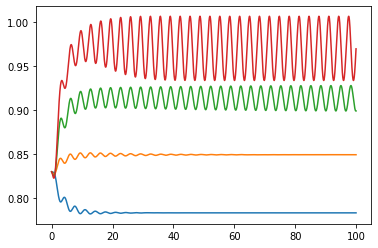

In [34]:
plt.figure()
for i in range(0,4):

    initial_conditions_5 =  [cmax, mu0, mu1, eps, cp, phi0, phi1, 75+5*i, lam, opt_prey, opt_pred]
    t_start = 0
    t_end = 100
    init = [1.2, 0.58, 0.83]
    sol = scipy.integrate.solve_ivp(fun = lambda t, y : optimal_behavior_trajectories(t, y, *initial_conditions_5), 
                                    t_span = [t_start, t_end], y0 = init, max_step = 0.05)
    plt.plot(sol.t, sol.y[2])
#plt.plot(sol.t, sol.y[1])
plt.show()

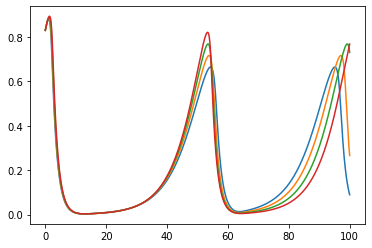

In [35]:
plt.figure()
for i in range(0,4):

    initial_conditions_5 =  [cmax, mu0, mu1, eps, cp, phi0, phi1, 75+5*i, lam, opt_prey, opt_pred]
    t_start = 0
    t_end = 100
    init = [1.2, 0.58, 0.83]
    sol = scipy.integrate.solve_ivp(fun = lambda t, y : optimal_behavior_trajectories_basic(t, y, *initial_conditions_5), 
                                    t_span = [t_start, t_end], y0 = init, max_step = 0.05)
    plt.plot(sol.t, sol.y[2])
#plt.plot(sol.t, sol.y[1])
plt.show()

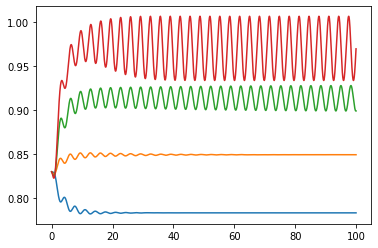

In [50]:
plt.figure()
for i in range(0,4):

    initial_conditions_5 =  [cmax, mu0, mu1, eps, cp, phi0, phi1, 75+5*i, lam, opt_prey, opt_pred]
    t_start = 0
    t_end = 100
    init = [1.2, 0.58, 0.83]
    sol = scipy.integrate.solve_ivp(fun = lambda t, y : optimal_behavior_trajectories(t, y, *initial_conditions_5), 
                                    t_span = [t_start, t_end], y0 = init, max_step = 0.05)
    plt.plot(sol.t, sol.y[2])
#plt.plot(sol.t, sol.y[1])
plt.show()

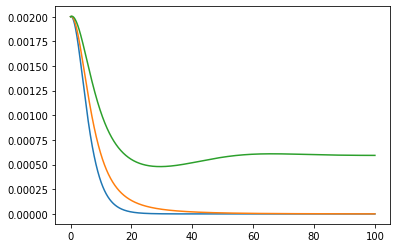

In [41]:
plt.figure()
for i in range(1,4):

    initial_conditions_5 =  [cmax, mu0, mu1, eps, cp, phi0, phi1, i*0.05, lam, opt_prey, opt_pred]
    t_start = 0
    t_end = 100
    init = [0.12, 0.002, 0.00]
    sol = scipy.integrate.solve_ivp(fun = lambda t, y : optimal_behavior_trajectories_basic(t, y, *initial_conditions_5), 
                                    t_span = [t_start, t_end], y0 = init, max_step = 0.05)
    plt.plot(sol.t, sol.y[1])
#plt.plot(sol.t, sol.y[1])
plt.show()

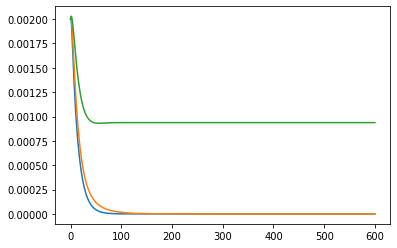

In [46]:
plt.figure()
for i in range(1,4):
    initial_conditions_5 =  [cmax, mu0, mu1, eps, cp, phi0, phi1, i*0.05, lam, True, False]
    t_start = 0
    t_end = 600
    init = [0.12, 0.002, 0.00]
    sol = scipy.integrate.solve_ivp(fun = lambda t, y : optimal_behavior_trajectories(t, y, *initial_conditions_5, ), 
                                    t_span = [t_start, t_end], y0 = init, max_step = 0.1)
    plt.plot(sol.t, sol.y[1])
    #plt.plot(sol.t, sol.y[0])

plt.show()

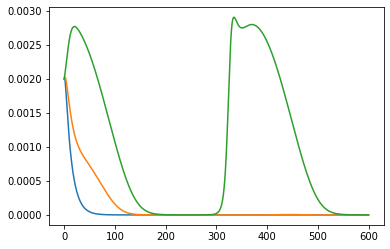

In [51]:
plt.figure()
for i in range(1,4):
    initial_conditions_5 =  [cmax, mu0, mu1, eps, cp, phi0, phi1, i*0.05, lam, True, False]
    t_start = 0
    t_end = 600
    init = [0.12, 0.002, 0.00]
    sol = scipy.integrate.solve_ivp(fun = lambda t, y : optimal_behavior_trajectories(t, y, *initial_conditions_5, seasons = True), 
                                    t_span = [t_start, t_end], y0 = init, max_step = 0.1)
    plt.plot(sol.t, sol.y[1])
    #plt.plot(sol.t, sol.y[0])

plt.show()

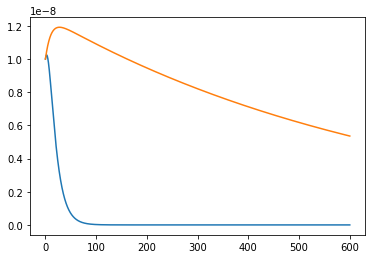

In [79]:
plt.figure()
for i in range(3,5):
    initial_conditions_5 =  [cmax, mu0, mu1, eps, cp, phi0, phi1, i*0.028, lam, True, False]
    t_start = 0
    t_end = 600
    init = [0.12, 0.00000001, 0.00]
    sol = scipy.integrate.solve_ivp(fun = lambda t, y : optimal_behavior_trajectories(t, y, *initial_conditions_5, ), 
                                    t_span = [t_start, t_end], y0 = init, max_step = 0.1) #Should try changing the steady-state mortality. 
    plt.plot(sol.t, sol.y[1])
    #plt.plot(sol.t, sol.y[0])

tplt.show()

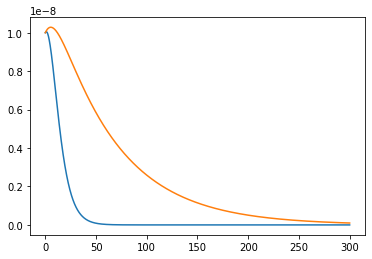

In [78]:
plt.figure()
for i in range(3,5):
    initial_conditions_5 =  [cmax, mu0, mu1, eps, cp, phi0, phi1, i*0.028, lam, True, False]
    t_start = 0
    t_end = 300
    init = [0.12, 0.00000001, 0.00]
    sol = scipy.integrate.solve_ivp(fun = lambda t, y : optimal_behavior_trajectories_basic(t, y, *initial_conditions_5, ), 
                                    t_span = [t_start, t_end], y0 = init, max_step = 0.1)
    plt.plot(sol.t, sol.y[1])
    #plt.plot(sol.t, sol.y[0])

plt.show()

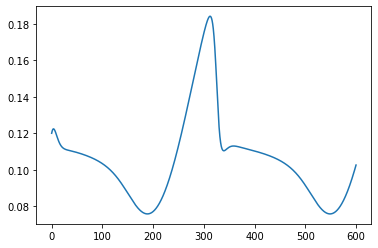

In [45]:
plt.plot(sol.t,sol.y[0])

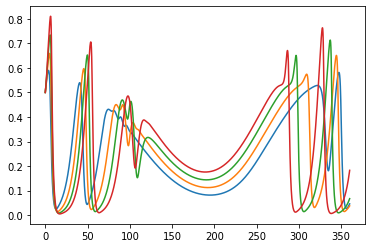

In [842]:
plt.figure()
for i in range(8,12):
    initial_conditions_5 =  [cmax, mu0, mu1, eps, cp, phi0, phi1, 5*(i+1), lam, opt_prey, opt_pred]
    t_start = 0
    t_end = 360
    init = [0.8, 0.5, 0.5] #[0.35, 1.8, 0.1]
    sol_basic = scipy.integrate.solve_ivp(fun = lambda t, y : optimal_behavior_trajectories_basic(t, y, *initial_conditions_5, seasons = True), 
                                    t_span = [t_start, t_end], y0 = init, max_step = 0.01)
    plt.plot(sol_basic.t, sol_basic.y[2])

plt.show()

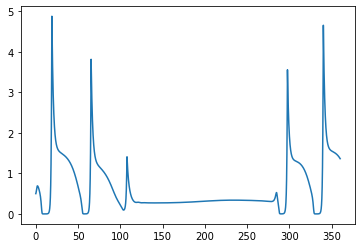

In [848]:
plt.plot(sol_basic.t, sol_basic.y[1])


In [756]:
t_start = 0
t_end = 130
init = [0.35, 1.8, 0.1]
sol_basic = scipy.integrate.solve_ivp(fun = lambda t, y : optimal_behavior_trajectories_basic(t, y, *initial_conditions_5), 
                                t_span = [t_start, t_end], y0 = init, max_step = 0.1)


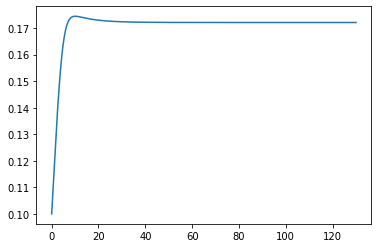

In [759]:
plt.plot(sol_basic.t, sol_basic.y[2])

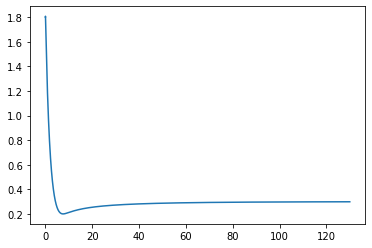

In [645]:
plt.plot(sol_basic.t, sol_basic.y[1])

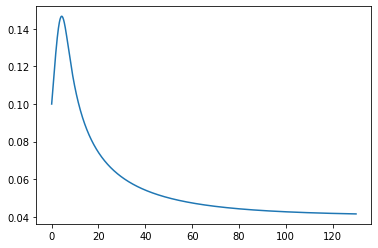

In [646]:
plt.plot(sol_basic.t, sol_basic.y[2])

array([1.00000000e-01, 1.00257622e-01, 1.00368353e-01, ...,
       1.40720860e-06, 1.39547035e-06, 1.39385687e-06])

In [458]:
t_start = 0
t_end = 130
init = [0.35, 1.8, 0.1]
sol_basic = scipy.integrate.solve_ivp(optimal_behavior_trajectories_basic, 
                                t_span = [t_start, t_end], y0 = init, max_step = 0.1)
